In [ ]:
# import zipfile
# import os
# path_to_zip_file  = os.path.join('dataset','rsna-pneumonia-detection-challenge.zip')
# directory_to_extract = os.path.join(os.getcwd(),'dataset')
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract)

In [1]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


All Import libraries

In [272]:
!cd

C:\Users\uUUUUvvvv\Desktop\projects\capstone_project


In [155]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import pydicom 
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import cv2
from cv2 import imread,resize,INTER_AREA,flip
import random
random.seed(10)

import pydicom
from pydicom.dataset import FileDataset, FileMetaDataset
from pydicom.uid import UID

import tensorflow as tf
from sklearn.model_selection import train_test_split
# example of loading the resnet50 model
# %%tensorflow_version 2.x
import tensorflow
import random
import numpy as np
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import regularizers, optimizers
# import keras_tuner as kt
import statistics
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, array_to_img


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import confusion_matrix

In [6]:
# %tensorflow_version 2.x
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Pneumonia-Detection_tensorflow
## What is Pneumonia?
Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or post- radiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis. CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift.

## Pneumonia Detection
Now to detection Pneumonia we need to detect Inflammation of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

## Business Domain Value
Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology). Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.

## Project description
In this capstone project, the goal is to build a pneumonia detection system, to locate the position of inflammation in an image. Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb X-rays and appear white in the image. While we are theoretically detecting “lung opacities”, there are lung opacities that are not pneumonia related. In the data, some of these are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. Details about the data and dataset files are given in below link, https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

## Pre-Processing, Data Visualization, EDA
- Exploring the given Data files, classes and images of different classes. 
- Dealing with missing values 
- Visualization of different classes 
- Analysis from the visualization of different classes. Model Building 
- Building a pneumonia detection model starting from basic CNN and then improving upon it. 
- Train the model 
- To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch. Test the Model, Fine-tuning and Repeat 
- Test the model and report as per evaluation metrics 
- Try different models 
- Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. for these models to fine-tune them 
- Report evaluation metrics for these models along with your observation on howchanging different hyper parameters leads to change in the final evaluation metric.

## Project Objective
The objective of the project is, 
- Learn to how to do build an Object Detection Model 
- Use transfer learning to fine-tune a model. 
- Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. 
- Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

## Project submissions and Evaluation Criteria
While we encourage peer collaboration and contribution, plagiarism, copying the code from other sources or peers will defeat the purpose of coming to this program. We expect the highest order of ethical behavior. Submit the project as given below. 
- Report with Problem Statement, Related Work, Your Approach and comparison of results with other models written in PDF. 
- Github link where the model is hosted. Evaluation Criteria: You must receive a minimum of 60% on each milestone to complete the project.

60 % Points = Complete 80 % Points = Excellent

**Dataware housing**

In [274]:
files2 = os.listdir(r'C:\Users\uUUUUvvvv\Desktop\projects\capstone_project\Capstone_CV_Project\raw_data\stage_2_train_images')
len(files2)

26684

In [3]:
class_info_path:str = os.path.join('Capstone_CV_Project',
                                   'raw_data',
                                   'stage_2_detailed_class_info.csv',
                                   'stage_2_detailed_class_info.csv')
train_label_path:str = os.path.join('Capstone_CV_Project',
                                    'raw_data',
                                    'stage_2_train_labels.csv',
                                    'stage_2_train_labels.csv')
class_info:str = pd.read_csv(class_info_path)
class_info

patientId                         class
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
...                                     ...                           ...
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8                  Lung Opacity
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba                        Normal
30224  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity

[30227 rows x 2 columns]

In [4]:
len(class_info['patientId'].unique())

26684

In [5]:
train_label:pd.DataFrame = pd.read_csv(train_label_path)
train_label

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    NaN    NaN    NaN     NaN   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    NaN    NaN    NaN     NaN   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
30222       1  
30223       0  
30224       0  
30225       1  
30226       1  

[30227 rows x 6 columns]

In [262]:
len(train_label['patientId'].unique())

26684

In [263]:
list(class_info['patientId'].unique()) == list(train_label['patientId'].unique())

True

In [264]:
train_label.isna().sum()/len(train_label)

patientId    0.000000
x            0.683892
y            0.683892
width        0.683892
height       0.683892
Target       0.000000
dtype: float64

In [9]:
labels_info:pd.DataFrame  = pd.merge(class_info,train_label,on = 'patientId', how='inner')
# labels_info = labels_info.drop_duplicates("patientId")
labels_info

patientId                         class  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal   
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal   
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity   
...                                     ...                           ...   
37624  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal   
37625  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
37626  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
37627  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
37628  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   

           x      y  width  height  Target  
0        NaN    NaN    NaN     NaN       0  
1        NaN    NaN    NaN     NaN       0  
2        NaN    NaN    NaN     NaN       0  
3        NaN    NaN    NaN     NaN       0  
4      264.0  152.0  213.0   379.0       1  
...      ...    ...    ...     ...     ...  
37624    NaN    NaN    NaN     NaN       0  
37625  570.0  393.0  261.0   345.0       1  
37626  233.0  424.0  201.0   356.0       1  
37627  570.0  393.0  261.0   345.0       1  
37628  233.0  424.0  201.0   356.0       1  

[37629 rows x 7 columns]

In [11]:
# train_folder_name:str = 'stage_2_train_images'
# test_folder_name:str = 'stage_2_test_images' 
# train_folder_path:str = os.path.join('dataset',
#                                  train_folder_name)
# test_folder_path:str = os.path.join('dataset',
#                                  test_folder_name)
# list_train_file_names:list = list(os.listdir(train_folder_path))
# list_test_file_names:list = list(os.listdir(test_folder_path))

In [6]:
train_folder_name:str = 'stage_2_train_images'
test_folder_name:str = 'stage_2_test_images' 
train_folder_path:str = os.path.join('Capstone_CV_Project',
                                     'raw_data',
                                     train_folder_name)
test_folder_path:str = os.path.join('Capstone_CV_Project',
                                    'raw_data',
                                    test_folder_name)

In [7]:
list_train_file_names:list = list(os.listdir(train_folder_path))
list_test_file_names:list = list(os.listdir(test_folder_path))

In [10]:
len(labels_info['patientId'].unique())

26684

In [18]:
len(list_train_file_names)

13660

In [20]:
data_frequency = labels_info['patientId'].value_counts().reset_index()
data_frequency = data_frequency.sort_values(by='patientId', ascending=False)
data_frequency

index  patientId
0      3239951b-6211-4290-b237-3d9ad17176db         16
7      32408669-c137-4e8d-bd62-fe8345b40e73         16
12     0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d         16
11     ee820aa5-4804-4984-97b3-f0a71d69702f         16
10     1bf08f3b-a273-4f51-bafa-b55ada2c23b5         16
...                                     ...        ...
11157  f1d94ffb-f4ee-4e30-a376-90c51b843f90          1
11156  f8f84dd5-5c41-4f63-9d3b-23e6e04d7fe8          1
11155  f1d1ceac-9e6d-4ca8-b0da-f918df585511          1
11154  f1dfb6c6-9b3c-490c-b525-9c2c51252c6e          1
26683  943b27f1-ba1c-415b-b738-7b52aefa445b          1

[26684 rows x 2 columns]

In [21]:
pat_list:list = []
pat_freq_list = []
image_freq_list = []
for index in range(0,len(data_frequency)):
  pat_id = data_frequency.iloc[index]['index']
  pat_freq = data_frequency.iloc[index]['patientId']
  freq_images = len([value for value in list_train_file_names if value[:-4] == pat_id])
  pat_list.append(pat_id)
  pat_freq_list.append(pat_freq)
  image_freq_list.append(freq_images)

records:pd.DataFrame = pd.DataFrame({'patient_id':pat_list,
              'patient_frequency':pat_freq_list,
              'image_frequency':image_freq_list})
records

patient_id  patient_frequency  \
0      3239951b-6211-4290-b237-3d9ad17176db                 16   
1      32408669-c137-4e8d-bd62-fe8345b40e73                 16   
2      0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d                 16   
3      ee820aa5-4804-4984-97b3-f0a71d69702f                 16   
4      1bf08f3b-a273-4f51-bafa-b55ada2c23b5                 16   
...                                     ...                ...   
26679  f1d94ffb-f4ee-4e30-a376-90c51b843f90                  1   
26680  f8f84dd5-5c41-4f63-9d3b-23e6e04d7fe8                  1   
26681  f1d1ceac-9e6d-4ca8-b0da-f918df585511                  1   
26682  f1dfb6c6-9b3c-490c-b525-9c2c51252c6e                  1   
26683  943b27f1-ba1c-415b-b738-7b52aefa445b                  1   

       image_frequency  
0                    1  
1                    1  
2                    1  
3                    0  
4                    1  
...                ...  
26679                0  
26680                0  
26681                0  
26682                0  
26683                0  

[26684 rows x 3 columns]

In [22]:
records.sort_values(by='image_frequency', ascending=False)

patient_id  patient_frequency  \
0      3239951b-6211-4290-b237-3d9ad17176db                 16   
10198  678ba86f-2613-4fec-9655-4678be4847c0                  1   
10186  6732e2b6-1aa2-4731-89fa-6e2dd58c3195                  1   
10187  6733e222-411a-4703-98fe-9c147ef562b7                  1   
10188  6735932c-c8ca-45d5-be56-1ff682a3182e                  1   
...                                     ...                ...   
17429  b0e93c09-2d99-4e63-bc19-68d938095223                  1   
17430  b06e22ad-296d-4369-94ba-2902fd9b212a                  1   
17431  b0a145b5-d341-4c34-a6ff-9a81c66970c2                  1   
17432  b05197a4-ee7c-4a73-bf4b-081e9b5e6230                  1   
26683  943b27f1-ba1c-415b-b738-7b52aefa445b                  1   

       image_frequency  
0                    1  
10198                1  
10186                1  
10187                1  
10188                1  
...                ...  
17429                0  
17430                0  
17431                0  
17432                0  
26683                0  

[26684 rows x 3 columns]

In [23]:
labels_info.isna().sum()/len(labels_info)

patientId    0.000000
class        0.000000
x            0.549364
y            0.549364
width        0.549364
height       0.549364
Target       0.000000
dtype: float64

In [24]:
labels_info[labels_info['x'].isna()]['class'].unique()

array(['No Lung Opacity / Not Normal', 'Normal'], dtype=object)

So we could infer that, we dont have coordinates for those patients who have below status
- No Lung Opacity/ Not Normal
- Normal.
As our model task is to only detect the pneumonia, So we got coordinates for only those cases. 

In [25]:
labels_info[labels_info['x'].isna()]['Target'].unique()

array([0], dtype=int64)

Loading the pixel information of images

path settings!!

In [26]:
list_train_file_names:list = list(os.listdir(train_folder_path))

In [27]:
filtered_labels:pd.DataFrame = labels_info[labels_info['patientId'] == '3239951b-6211-4290-b237-3d9ad17176db']
filtered_labels.drop_duplicates()

patientId         class      x      y  width  \
3411  3239951b-6211-4290-b237-3d9ad17176db  Lung Opacity  511.0  249.0  188.0   
3412  3239951b-6211-4290-b237-3d9ad17176db  Lung Opacity  558.0  649.0  174.0   
3413  3239951b-6211-4290-b237-3d9ad17176db  Lung Opacity  152.0  661.0  191.0   
3414  3239951b-6211-4290-b237-3d9ad17176db  Lung Opacity  198.0  370.0  204.0   

      height  Target  
3411   232.0       1  
3412   186.0       1  
3413   145.0       1  
3414   205.0       1

In [ ]:
def get_dicom_info()->pd.DataFrame:
  #train_pixels:list = []
  patient_ids_list:list = []
  labels:list = []
  label_encoded:list = []
  gender:list = []
  age:list = []
  view_position:list = []
  modality:list = []
  # x_coordinate_values:list = []
  # y_coordinate_values:list = []
  # width_coordinate_values:list = []
  # height_coordinate_values:list = []
  coordinates_list = []
  rows_list = []
  columns_list = []
  count:int = 0
  buffer:int = 1
  #iterating through the files on the training folder
  for file_name in list_train_file_names:
    path_image:str = os.path.join(train_folder_path,file_name)
    #reading the dicom image!!
    dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
    #extracting the information from labes files for the following image!!
    filtered_labels:pd.DataFrame = labels_info[labels_info['patientId'] == dicom_obj.PatientID]
    #extracting the patient ids
    patient_ids_list.append(dicom_obj.PatientID)
    #extracting the encoded value of the target varaible
    label_encoded.append(
        int(filtered_labels['Target'].iloc[0])
    )
    #extracting the actual class name
    labels.append(
        filtered_labels['class'].iloc[0]
    )
    #extracting the coordinates
    #if we have more the one coordinates for image.
    if filtered_labels.shape[0] > 1:
      buffer_list:list = []
      filtered_labels:pd.DataFrame = filtered_labels.drop_duplicates()
      for index in range(0,filtered_labels.shape[0]):
        buffer_list.append([
            filtered_labels.iloc[index]['x'],
            filtered_labels.iloc[index]['y'],
            filtered_labels.iloc[0]['width'],
            filtered_labels.iloc[0]['height']
        ])
      coordinates_list.append(buffer_list)
    #if we got only one bounding box in the image!!
    else:
      coordinates_list.append(
          [
           filtered_labels.iloc[0]['x'],
           filtered_labels.iloc[0]['y'],
           filtered_labels.iloc[0]['width'],
           filtered_labels.iloc[0]['height']
          ]
      )
    # x_coordinate_values.append(
    #     filtered_labels['x'].iloc[0]
    # )
    # y_coordinate_values.append(
    #     filtered_labels['y'].iloc[0]
    # )
    # width_coordinate_values.append(
    #     filtered_labels['width'].iloc[0]
    # )
    # height_coordinate_values.append(
    #     filtered_labels['height'].iloc[0]
    # )
    gender.append(dicom_obj.PatientSex)
    
    #extracting age from dicom header 
    age.append(dicom_obj.PatientAge)
    #extracting view position from dicom header
    view_position.append(dicom_obj.ViewPosition)
    #extracting modality from dicom header
    modality.append(dicom_obj.Modality)
    #extracting number of rows from dicom header
    rows_list.append(dicom_obj.Rows)
    #extracting number of columns from dicom header
    columns_list.append(dicom_obj.Columns)
    #train_pixels.append(dicom_obj.pixel_array)
    count+=1
    percentage = int((count/len(list_train_file_names))*100)
    if percentage >= buffer:
      print(f'--------{percentage}% images information retrived from {len(list_train_file_names)} images----------')
      buffer+=1

  info_dicom_header:pd.DataFrame = pd.DataFrame({'Patient_ids':patient_ids_list,
              'Class':labels,
              'Encoded_class':label_encoded,
              'Gender':gender,
              'Age':age,
              'View_position':view_position,
              'Modality':modality,
              'coordinates':coordinates_list,
              'No_rows':rows_list,
              'No_columns':columns_list})
  #train_pixels:np.array = np.array(train_pixels)
  return info_dicom_header

Uncomment to load the data back

In [73]:
coordinates_info = get_dicom_info()
process_storage_folder_path:str = os.path.join(os.getcwd(),'pre_processed_data_set') 
saved_file_name_coordinates:str = os.path.join(process_storage_folder_path, "coordinates_org.pkl")

--------1% images information retrived from 26684 images----------
--------2% images information retrived from 26684 images----------
--------3% images information retrived from 26684 images----------
--------4% images information retrived from 26684 images----------
--------5% images information retrived from 26684 images----------
--------6% images information retrived from 26684 images----------
--------7% images information retrived from 26684 images----------
--------8% images information retrived from 26684 images----------
--------9% images information retrived from 26684 images----------
--------10% images information retrived from 26684 images----------
--------11% images information retrived from 26684 images----------
--------12% images information retrived from 26684 images----------
--------13% images information retrived from 26684 images----------
--------14% images information retrived from 26684 images----------
--------15% images information retrived from 26684 images

saving the file!!

In [74]:
coordinates_info.to_pickle(saved_file_name_coordinates)

loading the saved file!!

In [267]:
process_storage_folder_path:str = os.path.join(os.getcwd(),'pre_processed_data_set') 
saved_file_name_coordinates:str = os.path.join(process_storage_folder_path, "coordinates_org.pkl")
coordinates_info:pd.DataFrame = pd.read_pickle(saved_file_name_coordinates)
coordinates_info

Patient_ids                         Class  \
0      f74e692e-1ccd-4f5e-bc19-482325025a41                        Normal   
1      f7909c0c-c9f0-4c93-be7f-113926850ac3  No Lung Opacity / Not Normal   
2      f758a20a-506d-4e4e-97d7-54043148fb59                        Normal   
3      f78a62d0-f9aa-4828-ad8c-ec4917f52d48                  Lung Opacity   
4      f7a5fd29-dd8d-4f85-8164-69b2e83da35e                        Normal   
...                                     ...                           ...   
26679  0986f27b-74ed-4bc7-9595-e40b345cb161  No Lung Opacity / Not Normal   
26680  094eed38-9c5b-4042-936d-344ccec4c3cc                  Lung Opacity   
26681  0983ae59-b906-4fd5-a810-edfe0580fe3b                  Lung Opacity   
26682  098fdba1-4918-40e8-bb74-9945214c8bd5                        Normal   
26683  09794a15-ea37-41f8-8a0e-a56a9a93eaa6                        Normal   

       Encoded_class Gender Age View_position Modality  \
0                  0      F  62            AP       CR   
1                  0      F  81            AP       CR   
2                  0      M  45            PA       CR   
3                  1      F  66            AP       CR   
4                  0      M  50            PA       CR   
...              ...    ...  ..           ...      ...   
26679              0      M  52            AP       CR   
26680              1      F  65            AP       CR   
26681              1      M  59            PA       CR   
26682              0      F  45            AP       CR   
26683              0      M  57            PA       CR   

                                             coordinates  No_rows  No_columns  
0                                   [nan, nan, nan, nan]     1024        1024  
1                                   [nan, nan, nan, nan]     1024        1024  
2                                   [nan, nan, nan, nan]     1024        1024  
3                           [181.0, 695.0, 195.0, 187.0]     1024        1024  
4                                   [nan, nan, nan, nan]     1024        1024  
...                                                  ...      ...         ...  
26679                               [nan, nan, nan, nan]     1024        1024  
26680  [[122.0, 350.0, 300.0, 450.0], [544.0, 346.0, ...     1024        1024  
26681                       [212.0, 333.0, 224.0, 391.0]     1024        1024  
26682                               [nan, nan, nan, nan]     1024        1024  
26683                               [nan, nan, nan, nan]     1024        1024  

[26684 rows x 10 columns]

**EDA**

In [23]:
print(f'The unique row size of images {coordinates_info.No_rows.unique()}')
print(f'The unique column size of images {coordinates_info.No_columns.unique()}')

The unique row size of images [1024]
The unique column size of images [1024]


In [24]:
print(f'The unique Modalitys {coordinates_info.Modality.unique()}')

The unique Modalitys ['CR']


All images in our sample of data are square images where there size is 1024*1024

In [25]:
coordinates_info['Age'] = coordinates_info['Age'].astype('int')

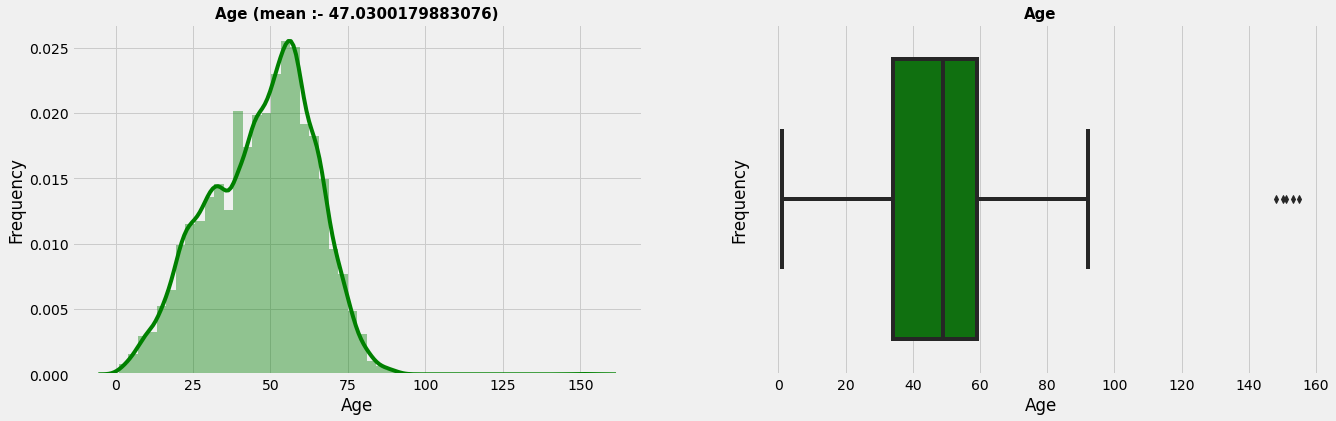

In [26]:
import warnings
warnings.filterwarnings("ignore")
all_colors: list = [
    "blue",
    "green",
    "yellow",
    "pink",
    "orange",
    "purple",
    "brown",
    "red",
]
col = np.random.choice(all_colors)
# variable 1
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title('Age (mean :- '+str(coordinates_info['Age'].astype('int').mean())+')', fontweight="bold", fontsize=15)
plt.ylabel("Frequency")
sns.distplot(coordinates_info['Age'], color=col)

plt.subplot(1, 2, 2)
plt.title('Age', fontweight="bold", fontsize=15)
plt.ylabel("Frequency")
sns.boxplot(coordinates_info['Age'].astype('int'), orient="vertical", color=col)
plt.show()

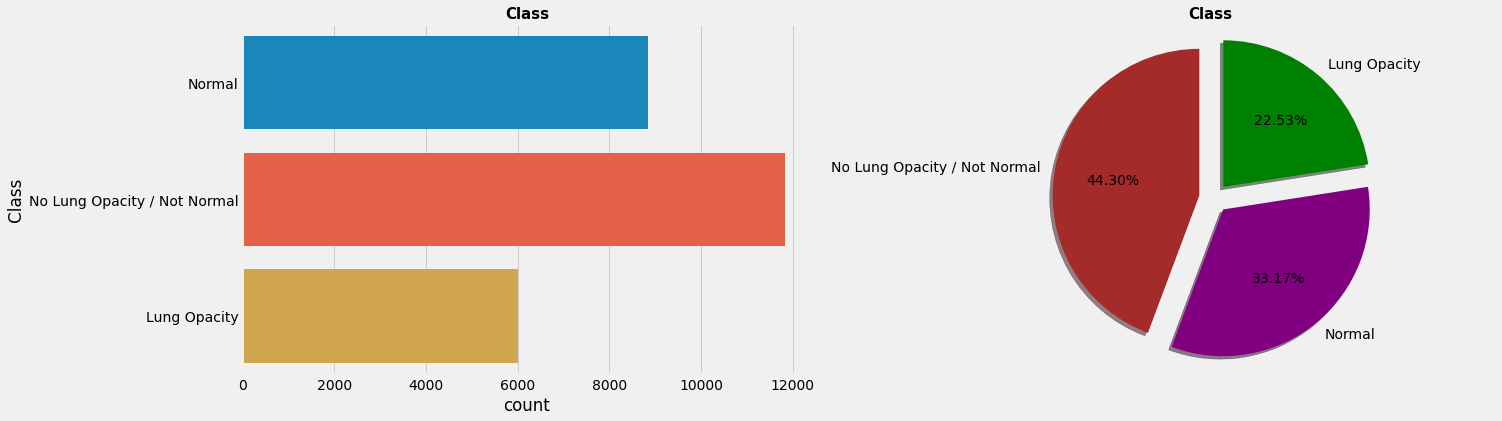

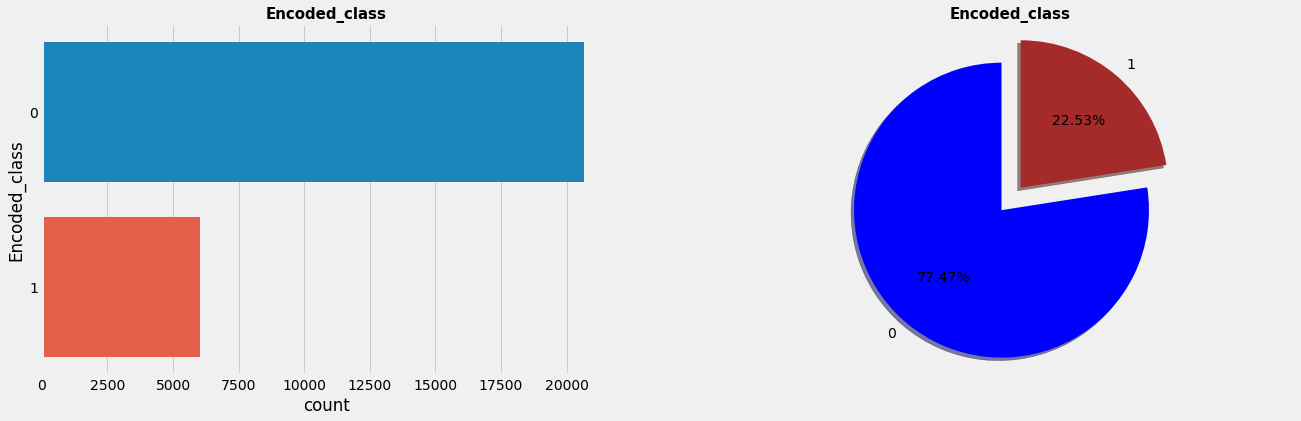

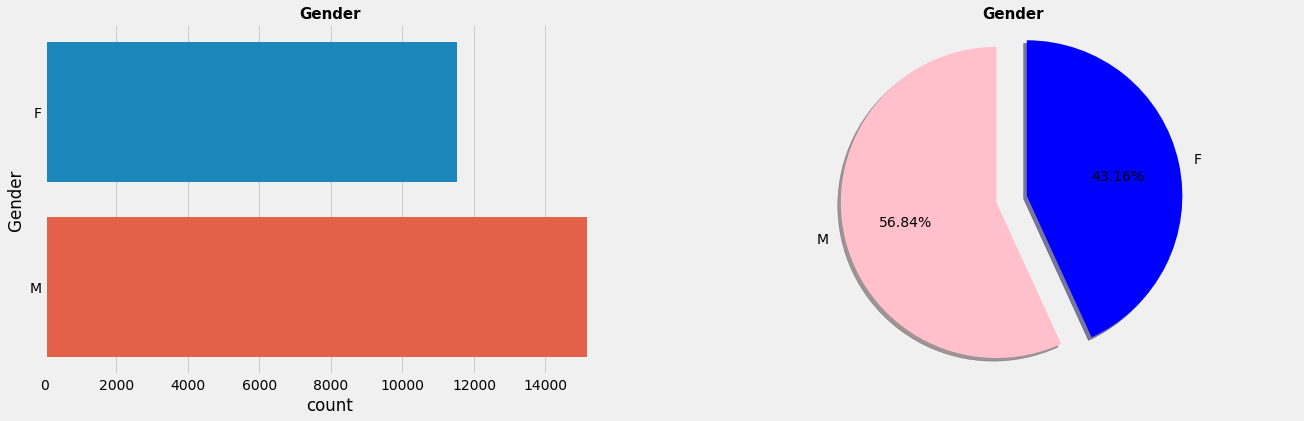

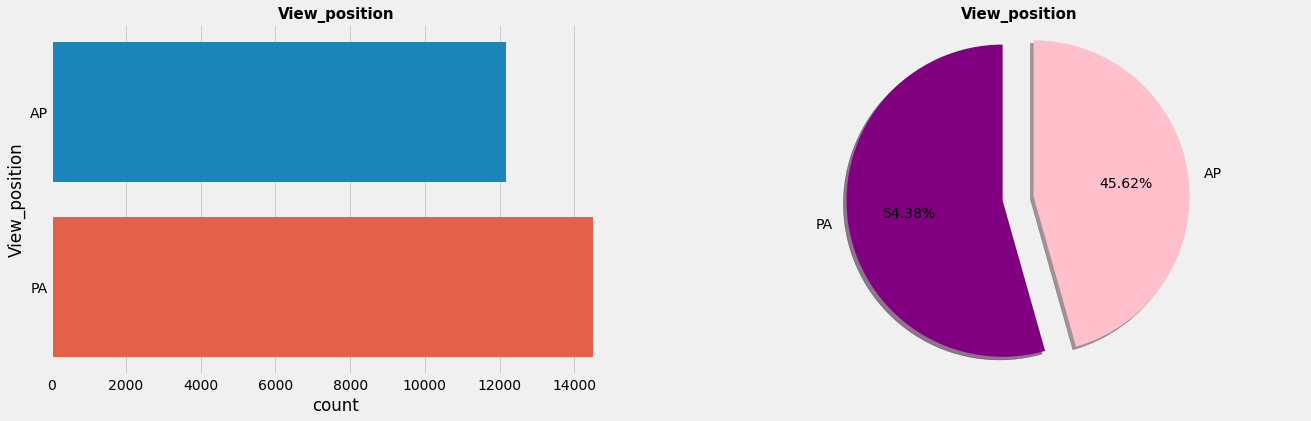

In [27]:
categorical_column_names = ['Class',
                            'Encoded_class',
                            'Gender',
                            'View_position']
for category_variable in categorical_column_names:
    #fig 1
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(20,6))
    plt.subplot(1, 2, 1)
    plt.title(category_variable,fontweight="bold",fontsize=15)
    sns.countplot(y=category_variable, data=coordinates_info)

    plt.subplot(1, 2, 2)
    plt.title(category_variable,fontweight="bold",fontsize=15)
    explode = []
    colors = []
    for ex in coordinates_info[category_variable].unique():
        explode.append(0.1)
        colors.append(np.random.choice(all_colors))
    plt.pie(coordinates_info[category_variable].value_counts().reset_index()[category_variable],labels=coordinates_info[category_variable].value_counts().reset_index()['index'], colors=colors, startangle=90, shadow=True,explode=tuple(explode), autopct='%1.2f%%')
    plt.axis('equal')
plt.show()

we can infer from the above visulation,

- Encoded_class :- We have class imbalance problem in our dataset, where we have only 22% of patients who got effected by pneumonia

- we can also see from the view position that we got two different view points of medical images.

- AP - erect anteroposterior chest view is an alternative to the PA view when the patient is too unwell to tolerate standing or leaving the bed 

- PA - Chest Posterior Anterior 

In [28]:
coordinates_info.groupby(['View_position']).count()/len(coordinates_info)

Patient_ids     Class  Encoded_class    Gender       Age  \
View_position                                                             
AP                0.456191  0.456191       0.456191  0.456191  0.456191   
PA                0.543809  0.543809       0.543809  0.543809  0.543809   

               Modality  coordinates   No_rows  No_columns  
View_position                                               
AP             0.456191     0.456191  0.456191    0.456191  
PA             0.543809     0.543809  0.543809    0.543809

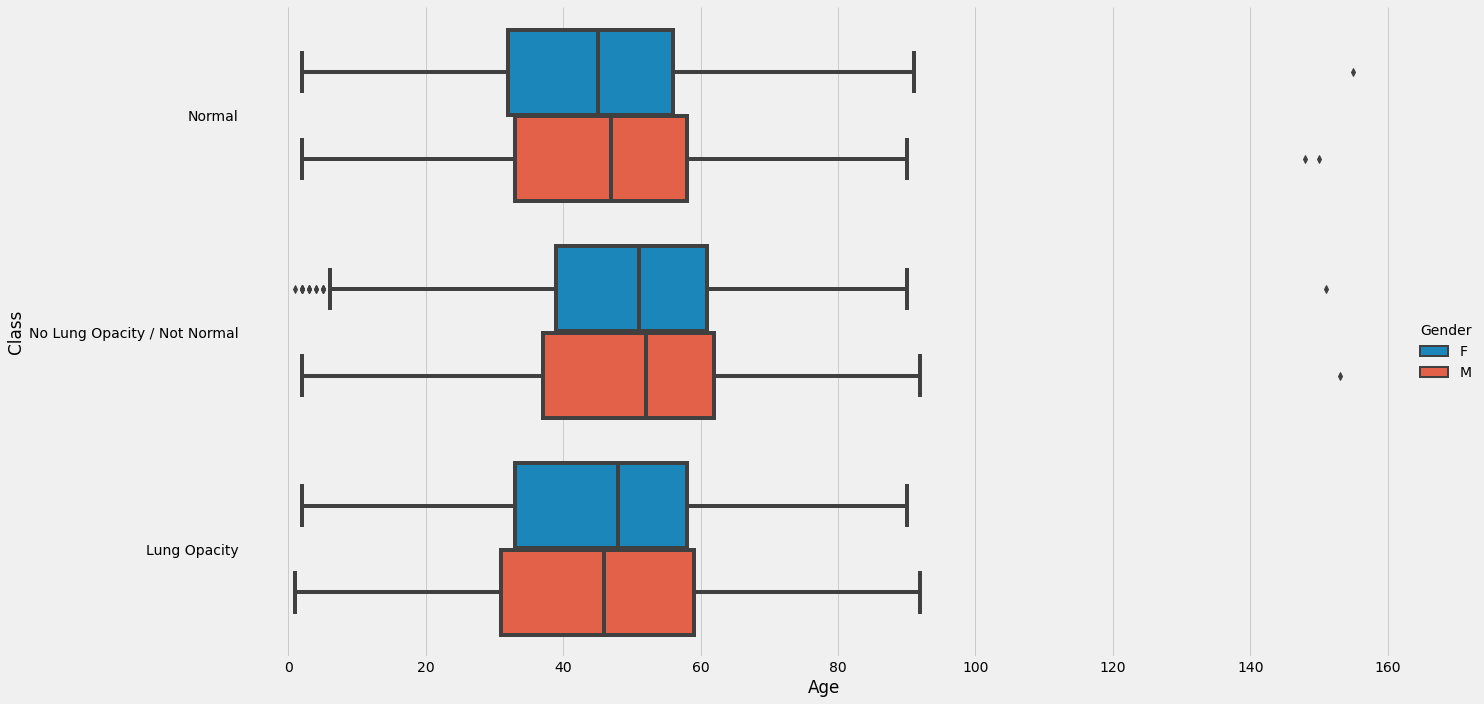

In [29]:
sns.catplot(x="Age", y="Class", kind="box",hue="Gender", data=coordinates_info,orient="h",height=10, aspect=2)

#### Images which contain Lung Opacity

**viewing AP view**

In [30]:
filtered_ap_data:pd.DataFrame = coordinates_info.loc[(coordinates_info.View_position == 'AP') & (coordinates_info.Encoded_class == 1)]
filtered_ap_data.head(2)

Patient_ids         Class  Encoded_class Gender  \
3  f78a62d0-f9aa-4828-ad8c-ec4917f52d48  Lung Opacity              1      F   
8  f7a42b73-f909-4e1f-89dd-c776f45cdc40  Lung Opacity              1      M   

   Age View_position Modality  \
3   66            AP       CR   
8   34            AP       CR   

                                         coordinates  No_rows  No_columns  
3                       [181.0, 695.0, 195.0, 187.0]     1024        1024  
8  [[638.0, 367.0, 250.0, 519.0], [178.0, 341.0, ...     1024        1024

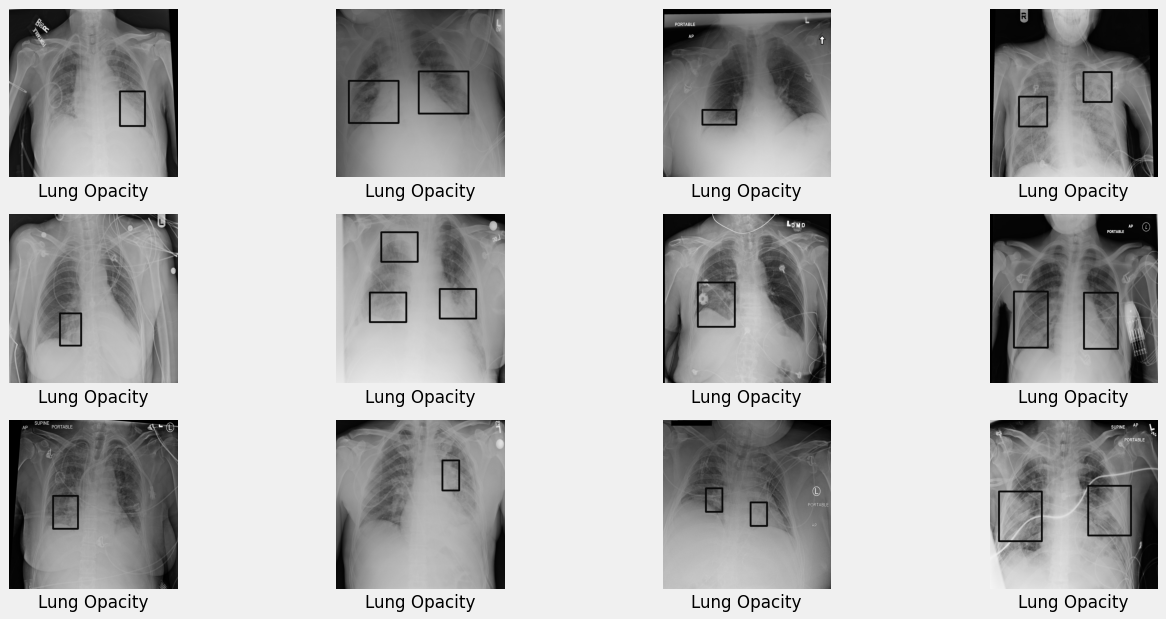

In [31]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_ap_data.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
for index_number in rows_to_display:
  num+=1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  path_image:str = os.path.join(train_folder_path,
                                filtered_ap_data.loc[index_number].Patient_ids+'.dcm')
  dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
  pixel_values:np.array = dicom_obj.pixel_array
  if type(filtered_ap_data.loc[index_number].coordinates[0]) == list:
    for coordinate in filtered_ap_data.loc[index_number].coordinates:
      cv2.rectangle(pixel_values, (int(coordinate[0]),
                                   int(coordinate[1])),
                     (int(coordinate[0])+int(coordinate[2]),
                      int(coordinate[1])+int(coordinate[3])), (10, 255, 0), 10)
  else:
    coordinate:list = filtered_ap_data.loc[index_number].coordinates
    cv2.rectangle(pixel_values, (int(coordinate[0]),
                                 int(coordinate[1])),
                   (int(coordinate[0])+int(coordinate[2]), int(coordinate[1])+int(coordinate[3])), (10, 255, 0), 10)
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(filtered_ap_data.loc[index_number].Class)
plt.show()

**viewing PA view**

In [32]:
filtered_pa_data:pd.DataFrame = coordinates_info.loc[(coordinates_info.View_position == 'PA') & (coordinates_info.Encoded_class == 1)]
filtered_pa_data.head(2)

Patient_ids         Class  Encoded_class Gender  \
27  f7f3e746-b2d6-47e8-87fd-e7d9db9b1836  Lung Opacity              1      M   
81  f87e319e-34e7-4d47-893f-8a004ffcb94f  Lung Opacity              1      F   

    Age View_position Modality                   coordinates  No_rows  \
27   71            PA       CR  [139.0, 506.0, 298.0, 227.0]     1024   
81   32            PA       CR  [125.0, 258.0, 261.0, 365.0]     1024   

    No_columns  
27        1024  
81        1024

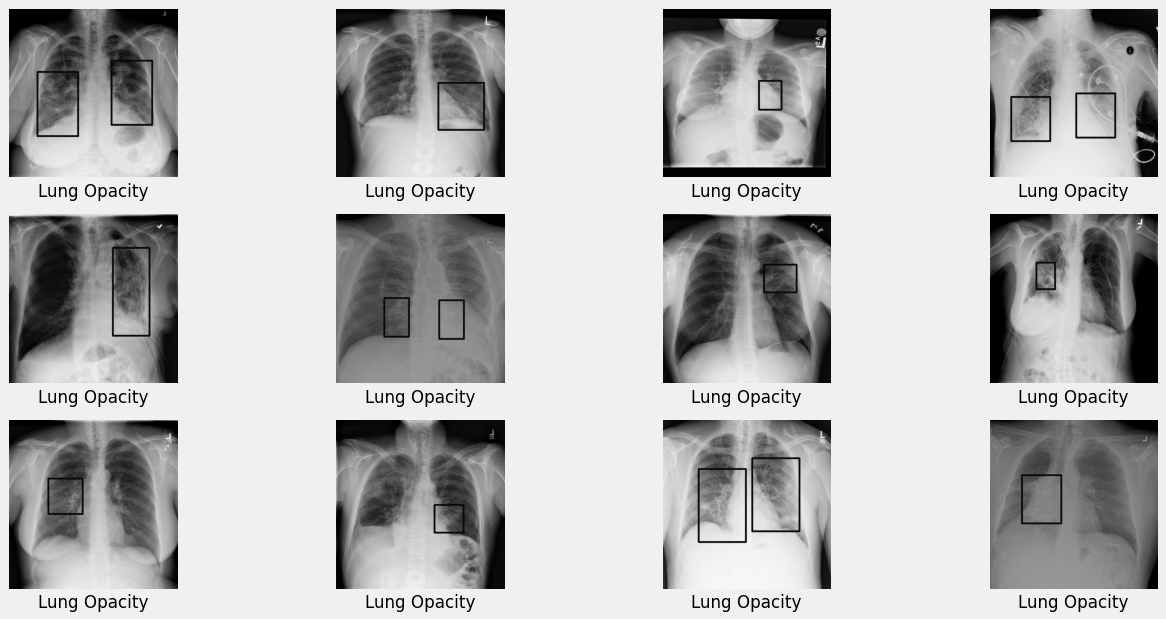

In [33]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_pa_data.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
for index_number in rows_to_display:
  num = num+1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  path_image:str = os.path.join(train_folder_path,
                                filtered_pa_data.loc[index_number].Patient_ids+'.dcm')
  dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
  pixel_values:np.array = dicom_obj.pixel_array
  if type(filtered_pa_data.loc[index_number].coordinates[0]) == list:
    for coordinate in filtered_pa_data.loc[index_number].coordinates:
      cv2.rectangle(pixel_values, (int(coordinate[0]),
                                   int(coordinate[1])),
                     (int(coordinate[0])+int(coordinate[2]),
                      int(coordinate[1])+int(coordinate[3])), (10, 255, 0), 10)
  else:
    coordinate:list = filtered_pa_data.loc[index_number].coordinates
    cv2.rectangle(pixel_values, (int(coordinate[0]),
                                 int(coordinate[1])),
                   (int(coordinate[0])+int(coordinate[2]), int(coordinate[1])+int(coordinate[3])), (10, 255, 0), 10)
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(filtered_pa_data.loc[index_number].Class)
plt.show()

#### Images which does not contain Pneumonia
**viewing AP view**

In [34]:
filtered_ap_data:pd.DataFrame = coordinates_info.loc[(coordinates_info.View_position == 'AP') & (coordinates_info.Encoded_class == 0)]
filtered_ap_data.head(2)

Patient_ids                         Class  \
0  f74e692e-1ccd-4f5e-bc19-482325025a41                        Normal   
1  f7909c0c-c9f0-4c93-be7f-113926850ac3  No Lung Opacity / Not Normal   

   Encoded_class Gender  Age View_position Modality           coordinates  \
0              0      F   62            AP       CR  [nan, nan, nan, nan]   
1              0      F   81            AP       CR  [nan, nan, nan, nan]   

   No_rows  No_columns  
0     1024        1024  
1     1024        1024

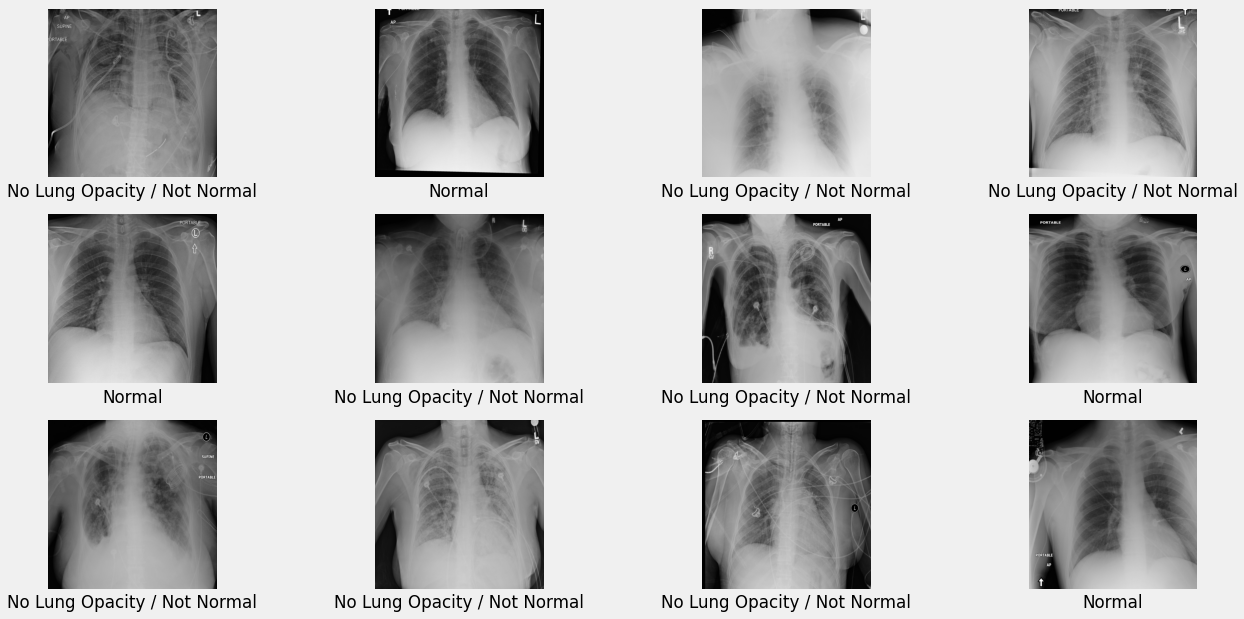

In [35]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_ap_data.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
for index_number in rows_to_display:
  num+=1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  path_image:str = os.path.join(train_folder_path,
                                filtered_ap_data.loc[index_number].Patient_ids+'.dcm')
  dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
  pixel_values:np.array = dicom_obj.pixel_array
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(filtered_ap_data.loc[index_number].Class)
plt.show()

**viewing PA view**

In [36]:
filtered_pa_data:pd.DataFrame = coordinates_info.loc[(coordinates_info.View_position == 'PA') & (coordinates_info.Encoded_class == 0)]
filtered_pa_data.head(2)

Patient_ids   Class  Encoded_class Gender  Age  \
2  f758a20a-506d-4e4e-97d7-54043148fb59  Normal              0      M   45   
4  f7a5fd29-dd8d-4f85-8164-69b2e83da35e  Normal              0      M   50   

  View_position Modality           coordinates  No_rows  No_columns  
2            PA       CR  [nan, nan, nan, nan]     1024        1024  
4            PA       CR  [nan, nan, nan, nan]     1024        1024

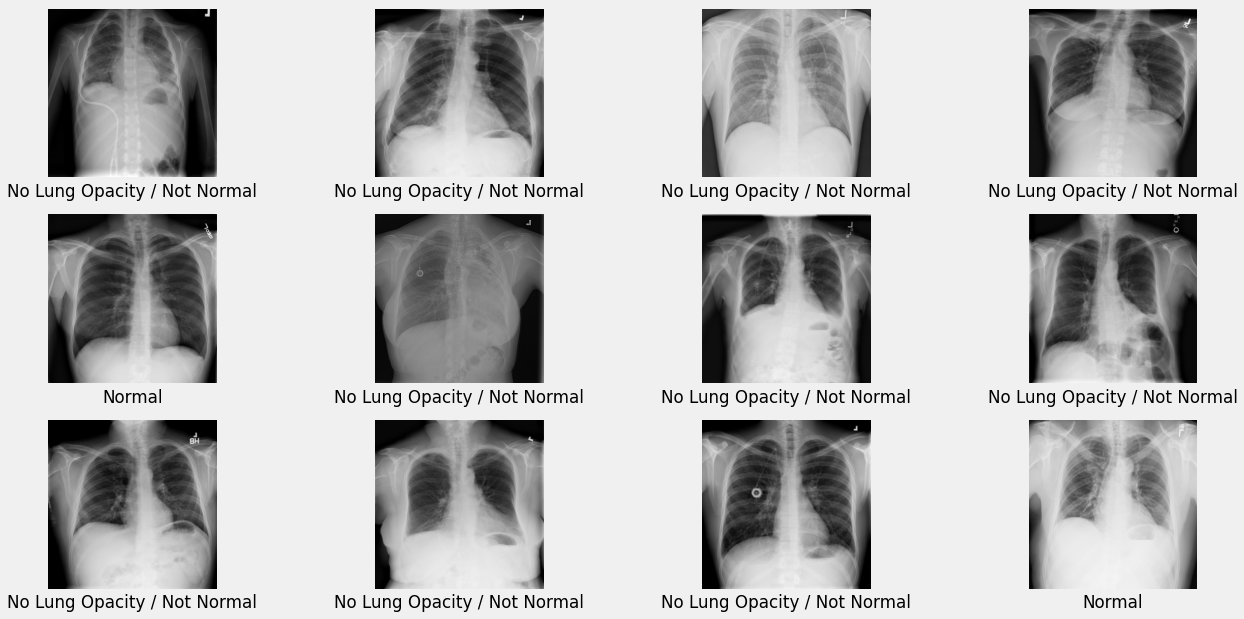

In [37]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_pa_data.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
for index_number in rows_to_display:
  num = num+1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  path_image:str = os.path.join(train_folder_path,
                                filtered_pa_data.loc[index_number].Patient_ids+'.dcm')
  dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
  pixel_values:np.array = dicom_obj.pixel_array
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(filtered_pa_data.loc[index_number].Class)
plt.show()

## Modelling pipeline
**Pre-processing**
- Split data into train and validation set
- change the image size according to the pre-train model!!
- compute coordinates according to updated image size!!
- standardize the pixel values in the image!!

In [180]:
process_storage_folder_path:str = os.path.join(os.getcwd(),'pre_processed_data_set') 
saved_file_name_coordinates:str = os.path.join(process_storage_folder_path, "coordinates_org.pkl")
coordinates_info:pd.DataFrame = pd.read_pickle(saved_file_name_coordinates)
coordinates_info.head(2)

Patient_ids                         Class  \
0  f74e692e-1ccd-4f5e-bc19-482325025a41                        Normal   
1  f7909c0c-c9f0-4c93-be7f-113926850ac3  No Lung Opacity / Not Normal   

   Encoded_class Gender Age View_position Modality           coordinates  \
0              0      F  62            AP       CR  [nan, nan, nan, nan]   
1              0      F  81            AP       CR  [nan, nan, nan, nan]   

   No_rows  No_columns  
0     1024        1024  
1     1024        1024

In [181]:
class_distribution_target:pd.DataFrame = coordinates_info['Encoded_class'].value_counts().reset_index().rename(columns = {'index':'class',
                                                                                 'Encoded_class':'frequency'}, inplace = False)
difference_in_frequency = class_distribution_target.iloc[:,1][0] - class_distribution_target.iloc[:,1][1]
difference_in_frequency

14660

### Data Agumentation

In [121]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip(mode="horizontal", seed=22),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1,0.2),
    layers.RandomBrightness(factor=[0.0,0.2]),
])

def basic_pre_processing(pixels_values):
    # pixels_values = cv2.cvtColor(pixels_values, cv2.COLOR_GRAY2RGB)
    #creating extra dimension
    pixels_values:np.array = np.stack((pixels_values,) * 3, -1)
    #resizing the image
    pixels_values:np.array = cv2.resize(pixels_values, (224,224),interpolation = cv2.INTER_NEAREST).astype('float16')
    #scaling the image.
    pixels_values:np.array = pixels_values/pixels_values.max()
    return pixels_values
    
def read_dicom(file_name):
    path_image:str = os.path.join(train_folder_path,file_name+'.dcm')
    dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
    pixels_values:np.array = dicom_obj.pixel_array
    return pixels_values
    
def get_trainImage_fromDicom():
    #getting the difference value of frequency between minor and major class. 
    class_distribution_target:pd.DataFrame = y_train.value_counts().reset_index().rename(columns = {'index':'class',
                                                                                 'Encoded_class':'frequency'}, inplace = False)
    difference_in_frequency = class_distribution_target.iloc[:,1][0] - class_distribution_target.iloc[:,1][1]
    difference_in_frequency
    count = 0
    for file_name,label in zip(x_train,y_train):
        print(label)
        #if the class label is pneumonia
        if label == 1 and count <= difference_in_frequency:
            #upsampling
            number_samples = [10,20,40,3,5,7,15,1,25,30,50,0]
            no_samples_generate = random.choice(number_samples)
            print(no_samples_generate)
            if no_samples_generate == 0:
                count+=1
                #reading the image.
                pixels_values = read_dicom(file_name)
                print(pixels_values.shape)
                final_pixels_values = basic_pre_processing(pixels_values)
                yield final_pixels_values,label
            elif no_samples_generate == 1:
                #reading the image.
                pixels_values = read_dicom(file_name)
                print(pixels_values.shape)
                processed_image = data_augmentation(pixel_values).numpy()
                final_pixels_values = basic_pre_processing(processed_image)
                count+=1
                yield final_pixels_values,label
            else:
                for sample_number in range(0,no_samples_generate):
                    #reading the image.
                    pixels_values = read_dicom(file_name)
                    processed_image = basic_pre_processing(pixels_values)
                    print(processed_image.shape)
                    final_pixels_values = data_augmentation(pixel_values).numpy()
                    count+=1
                    yield final_pixels_values,label
        else:
            #reading the image.
            pixels_values = read_dicom(file_name)
            final_pixels_values = basic_pre_processing(pixels_values)
            yield final_pixels_values,label
    
def get_testImage_fromDicom():
    for file_name,label in zip(x_test,y_test):
        #reading the image.
        pixels_values = read_dicom(file_name)
        pixels_values = basic_pre_processing(pixels_values)
        yield pixels_values,label

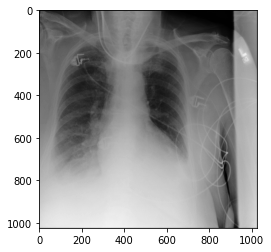

In [122]:
dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(os.path.join(train_folder_path,
                                                                      'f7909c0c-c9f0-4c93-be7f-113926850ac3.dcm'))
pixel_values:np.array = dicom_obj.pixel_array
plt.imshow(pixel_values,cmap = 'gray')

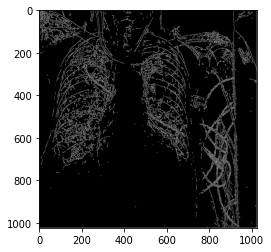

In [123]:
# Parameters
blur = 21
canny_low = 18
canny_high = 35
min_area = 0.0005
max_area = 0.95
dilate_iter = 10
erode_iter = 10
mask_color = (0.0,0.0,0.0)
edges = cv2.Canny(pixel_values, canny_low, canny_high)
plt.imshow(edges,cmap = 'gray')

In [ ]:
filtered_ap_data:pd.DataFrame = coordinates_info.loc[(coordinates_info.View_position == 'AP') & (coordinates_info.Encoded_class == 0)]
filtered_ap_data.head(2)

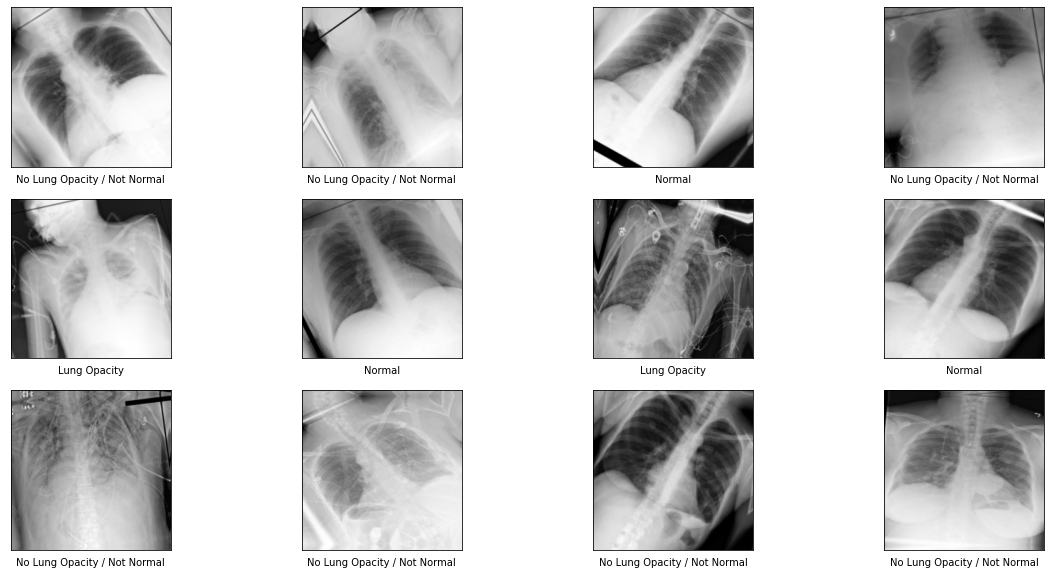

In [124]:
no_images:int = 12
rows_to_display:list = random.sample(list(coordinates_info.index), no_images)
random.seed(14)
plt.figure(figsize=(20,10))
num:int = 0
for index_number in rows_to_display:
    num = num+1
    plt.subplot(3,4,num)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path_image:str = os.path.join(train_folder_path,
                                coordinates_info.loc[index_number].Patient_ids+'.dcm')
    dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
    pixel_values:np.array = dicom_obj.pixel_array
    pre_processed_image = basic_pre_processing(pixel_values)
    final_img = data_augmentation(pre_processed_image).numpy()
    plt.imshow(final_img[:,:,1],cmap="gray")
    plt.xlabel(coordinates_info.loc[index_number].Class)
plt.show()

On Normal cases!!

In [ ]:
filtered_no_pneumonia = coordinates_info[coordinates_info['Encoded_class'] == 0]
filtered_no_pneumonia.head(2)

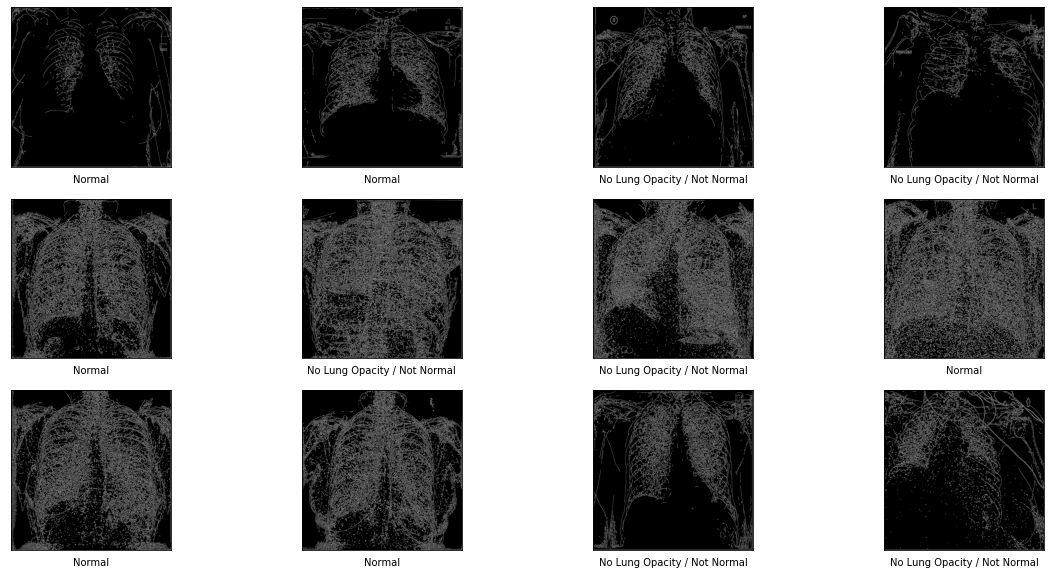

In [127]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_no_pneumonia.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
# Parameters
blur = 21
canny_low = 18
canny_high = 35
min_area = 0.0005
max_area = 0.95
dilate_iter = 10
erode_iter = 10
mask_color = (0.0,0.0,0.0)
for index_number in rows_to_display:
    num+=1
    plt.subplot(3,4,num)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path_image:str = os.path.join(train_folder_path,
                                filtered_no_pneumonia.loc[index_number].Patient_ids+'.dcm')
    dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
    pixel_values:np.array = dicom_obj.pixel_array
    edges = cv2.Canny(pixel_values, canny_low, canny_high)
    plt.imshow(edges,cmap = 'gray')
    plt.xlabel(filtered_no_pneumonia.loc[index_number].Class)
plt.show()

On Pneumonia cases!!

In [128]:
filtered_pneumonia = coordinates_info[coordinates_info['Encoded_class'] == 1]
filtered_pneumonia.head(2)

Patient_ids         Class  Encoded_class Gender  \
3  f78a62d0-f9aa-4828-ad8c-ec4917f52d48  Lung Opacity              1      F   
8  f7a42b73-f909-4e1f-89dd-c776f45cdc40  Lung Opacity              1      M   

  Age View_position Modality  \
3  66            AP       CR   
8  34            AP       CR   

                                         coordinates  No_rows  No_columns  
3                       [181.0, 695.0, 195.0, 187.0]     1024        1024  
8  [[638.0, 367.0, 250.0, 519.0], [178.0, 341.0, ...     1024        1024

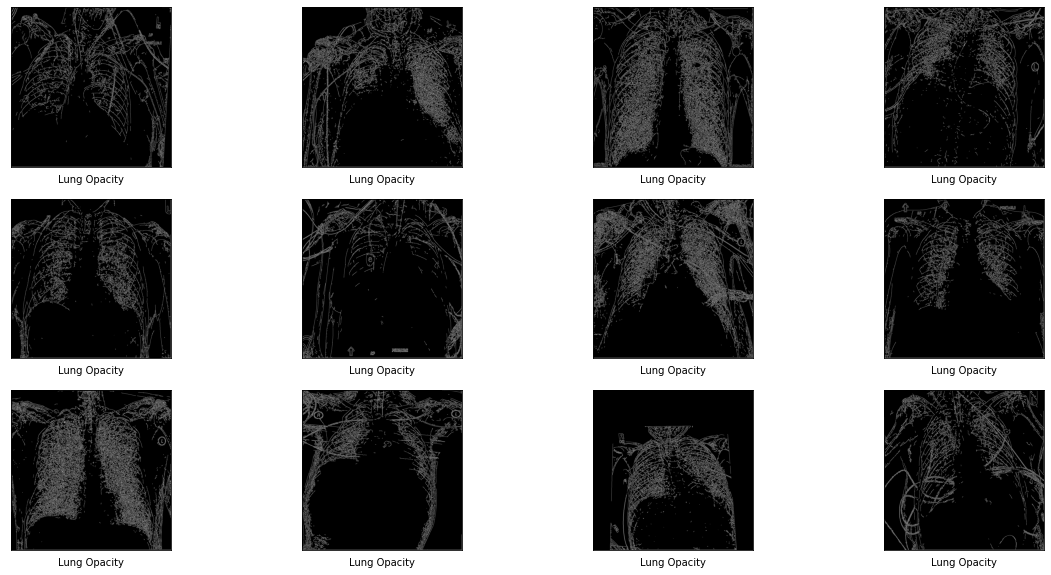

In [129]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_pneumonia.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
# Parameters
blur = 21
canny_low = 18
canny_high = 35
min_area = 0.0005
max_area = 0.95
dilate_iter = 10
erode_iter = 10
mask_color = (0.0,0.0,0.0)
for index_number in rows_to_display:
    num+=1
    plt.subplot(3,4,num)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path_image:str = os.path.join(train_folder_path,
                                filtered_pneumonia.loc[index_number].Patient_ids+'.dcm')
    dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
    pixel_values:np.array = dicom_obj.pixel_array
    edges = cv2.Canny(pixel_values, canny_low, canny_high)
    plt.imshow(edges,cmap = 'gray')
    plt.xlabel(filtered_pneumonia.loc[index_number].Class)
plt.show()

Splitting the data

In [84]:
x:pd.Series = coordinates_info['Patient_ids']
y:pd.Series = coordinates_info['Encoded_class']
x_train, x_test, y_train, y_test =   X_train, X_test, Y_train, Y_test = train_test_split(
      x, y,
      test_size=0.25,
      random_state=27,
      shuffle=True,
      stratify = y
  )
print(f'The shape of tain sample {len(x_train)}')
print(f'The shape of tain sample {len(x_test)}')

The shape of tain sample 20013
The shape of tain sample 6671


In [85]:
#hyper parameters
batch_size:int = 16
learning_rate:float = 1e-3
decay_rate:float = 1e-6
epochs:int=100

train_set_iterator = tf.data.Dataset.from_generator(get_trainImage_fromDicom,
                                                    output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
test_set_iterator = tf.data.Dataset.from_generator(get_testImage_fromDicom,
                                                   output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
train_set_iterator = train_set_iterator.batch(batch_size=batch_size)
for batch in train_set_iterator:
  arr,la = batch
  print(arr.shape)
  break

test_set_iterator = test_set_iterator.batch(batch_size=batch_size) 
for batch in test_set_iterator:
  arr,la = batch
  print(arr.shape)
  break

1
20
(224, 224, 3)


InvalidArgumentError: ValueError: Exception encountered when calling layer "random_flip_18" (type RandomFlip).

Image augmentation layers are expecting inputs to be rank 3 (HWC) or 4D (NHWC) tensors. Got shape: (1024, 1024)

Call arguments received by layer "random_flip_18" (type RandomFlip):
  • inputs=tf.Tensor(shape=(1024, 1024), dtype=float32)
  • training=True
Traceback (most recent call last):

  File "C:\Users\uUUUUvvvv\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)

  File "C:\Users\uUUUUvvvv\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\uUUUUvvvv\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\uUUUUvvvv\AppData\Local\Temp\ipykernel_21856\2139939813.py", line 60, in get_trainImage_fromDicom
    final_pixels_values = data_augmentation(pixel_values).numpy()

  File "C:\Users\uUUUUvvvv\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None

  File "C:\Users\uUUUUvvvv\AppData\Roaming\Python\Python310\site-packages\keras\layers\preprocessing\image_preprocessing.py", line 392, in call
    raise ValueError('Image augmentation layers are expecting inputs to be '

ValueError: Exception encountered when calling layer "random_flip_18" (type RandomFlip).

Image augmentation layers are expecting inputs to be rank 3 (HWC) or 4D (NHWC) tensors. Got shape: (1024, 1024)

Call arguments received by layer "random_flip_18" (type RandomFlip):
  • inputs=tf.Tensor(shape=(1024, 1024), dtype=float32)
  • training=True


	 [[{{node PyFunc}}]] [Op:IteratorGetNext]

In [47]:
# load model
resnet50v2_base_model = ResNet50V2(include_top=False, 
                   weights='imagenet',
                   input_shape=(224,224,3))
# summarize the model
resnet50v2_base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [48]:
tf.random.set_seed(21)
number_of_layers = len(resnet50v2_base_model.layers)
number_last_layers_to_be_trainable = 30
count = 0

for layer in resnet50v2_base_model.layers:
  if count < (number_of_layers-number_last_layers_to_be_trainable):
    layer.trainable = False
    count+=1
  else:
    count+=1

In [377]:
prediction_layer = layers.Dense(1,activation = 'sigmoid')
flatten_layer = layers.Flatten()
inputs = tensorflow.keras.Input(shape=(224, 224, 3))
x = tensorflow.keras.applications.resnet_v2.preprocess_input(inputs)
x = resnet50v2_base_model(x)
x = layers.Dropout(0.2)(x)
x = flatten_layer(x)
outputs = prediction_layer(x)
resnetv250_finetuned_model = tensorflow.keras.Model(inputs, outputs)

In [227]:
resnetv250_finetuned_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_6 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_6 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0   

In [210]:
tf.keras.utils.plot_model(resnetv250_finetuned_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [50]:
adam = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate,decay=decay_rate)
resnetv250_finetuned_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
weights_path:str = os.path.join(os.getcwd(),'saving_weights_training','classification')

In [52]:
def scheduler(epoch, lr):
  if epoch < 20:
    return lr
  else:
    return lr * tensorflow.math.exp(-0.1)

early_stopping = EarlyStopping(monitor='val_loss',mode = "min",patience=5)
model_checkpoint=tensorflow.keras.callbacks.ModelCheckpoint(weights_path, 
                                                    save_best_only=True,
                                                    save_weights_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

lr_schedular = tensorflow.keras.callbacks.LearningRateScheduler(scheduler)
import random
import numpy as np
import tensorflow as tf
random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)

history = resnetv250_finetuned_model.fit(
  train_set_iterator,
  validation_data=test_set_iterator,
  batch_size=batch_size,
  epochs=epochs,
  callbacks=[early_stopping,model_checkpoint,lr_schedular],
  workers = 2*batch_size,
  verbose=1
)

Epoch 1/100
   1251/Unknown - 3176s 3s/step - loss: 0.4972 - accuracy: 0.7710
Epoch 1: val_accuracy improved from -inf to 0.77485, saving model to C:\Users\uUUUUvvvv\Desktop\projects\capstone_project\saving_weights_training\classification
1251/1251 [==============================] - 3958s 3s/step - loss: 0.4972 - accuracy: 0.7710 - val_loss: 0.7016 - val_accuracy: 0.7748 - lr: 0.0010
Epoch 2/100
1251/1251 [==============================] - ETA: 0s - loss: 0.4449 - accuracy: 0.7875
Epoch 2: val_accuracy did not improve from 0.77485
1251/1251 [==============================] - 4397s 4s/step - loss: 0.4449 - accuracy: 0.7875 - val_loss: 1.4645 - val_accuracy: 0.7747 - lr: 0.0010
Epoch 3/100
1251/1251 [==============================] - ETA: 0s - loss: 0.4399 - accuracy: 0.7866
Epoch 3: val_accuracy did not improve from 0.77485
1251/1251 [==============================] - 3739s 3s/step - loss: 0.4399 - accuracy: 0.7866 - val_loss: 1.9749 - val_accuracy: 0.7747 - lr: 0.0010
Epoch 4/100
1251/

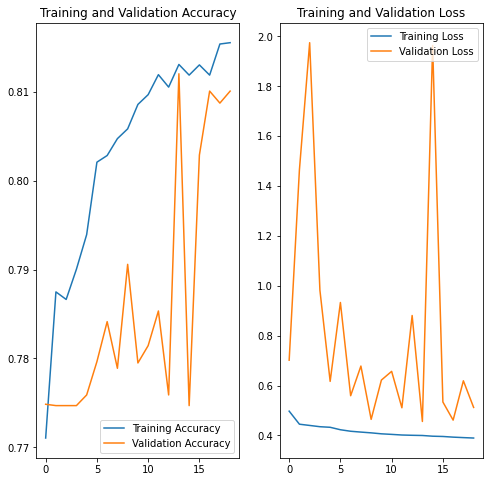

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range[:len(acc)], acc, label='Training Accuracy')
plt.plot(epochs_range[:len(acc)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[:len(acc)], loss, label='Training Loss')
plt.plot(epochs_range[:len(acc)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

-  For further retraining take aways are we could use higher learning rates!!

In [ ]:
history.history['accuracy']
training_logs:pd.DataFrame = pd.DataFrame({'training_accuracy_score':history.history['accuracy'],
             'validation_accuracy_score':history.history['val_accuracy'],
             'training_loss':history.history['loss'],
             'validation_loss':history.history['val_loss']})

In [63]:
training_logs.to_pickle(os.path.join(
    os.getcwd(),
    'training_logs.pkl'
))

In [64]:
pd.read_pickle(os.path.join(
    os.getcwd(),
    'training_logs.pkl'
))

training_accuracy_score  validation_accuracy_score  training_loss  \
0                  0.771049                   0.774846       0.497236   
1                  0.787488                   0.774696       0.444887   
2                  0.786639                   0.774696       0.439903   
3                  0.790036                   0.774696       0.434828   
4                  0.793934                   0.775896       0.432497   
5                  0.802079                   0.779643       0.422658   
6                  0.802828                   0.784140       0.416604   
7                  0.804727                   0.778894       0.413260   
8                  0.805826                   0.790586       0.410169   
9                  0.808574                   0.779493       0.406322   
10                 0.809674                   0.781442       0.404043   
11                 0.811922                   0.785340       0.401539   
12                 0.810523                   0.775896       0.400419   
13                 0.813071                   0.812022       0.399624   
14                 0.811872                   0.774696       0.396759   
15                 0.813022                   0.802878       0.395667   
16                 0.811872                   0.810073       0.393010   
17                 0.815370                   0.808724       0.391131   
18                 0.815520                   0.810073       0.389415   

    validation_loss  
0          0.701633  
1          1.464510  
2          1.974925  
3          0.982327  
4          0.616612  
5          0.933004  
6          0.559098  
7          0.678123  
8          0.464303  
9          0.621850  
10         0.656832  
11         0.510754  
12         0.880834  
13         0.455875  
14         1.963895  
15         0.533877  
16         0.461226  
17         0.618997  
18         0.512130

In [234]:
# load model
resnet50v2_base_model = ResNet50V2(include_top=False, 
                   weights=None,
                   input_shape=(224,224,3))
# summarize the model
prediction_layer = layers.Dense(1,activation = 'sigmoid')
flatten_layer = layers.Flatten()
inputs = tensorflow.keras.Input(shape=(224, 224, 3))
x = tensorflow.keras.applications.resnet_v2.preprocess_input(inputs)
x = resnet50v2_base_model(x)
x = layers.Dropout(0.2)(x)
x = flatten_layer(x)
outputs = prediction_layer(x)
resnetv250_finetuned_model = tensorflow.keras.Model(inputs, outputs)

In [235]:
adam = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate,decay=decay_rate)
resnetv250_finetuned_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [236]:
resnetv250_finetuned_model.load_weights(weights_path)

In [238]:
test_set_iterator = tf.data.Dataset.from_generator(get_testImage_fromDicom,
                                                   output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
test_set_iterator = test_set_iterator.batch(batch_size=1)
predictions_list = []
actual_list = []
for batch in test_set_iterator:
    arr,la = batch
    predictions = resnetv250_finetuned_model.predict(arr)
    print(predictions)
    predictions_list.append(float(predictions[0]))
    actual_list.append(int(la))

1/1 [==============================] - 1s 1s/step
[[0.249732]]
1/1 [==============================] - 0s 130ms/step
[[0.00193682]]
1/1 [==============================] - 0s 143ms/step
[[0.14121158]]
1/1 [==============================] - 0s 107ms/step
[[0.26124895]]
1/1 [==============================] - 0s 126ms/step
[[0.01025544]]
1/1 [==============================] - 0s 203ms/step
[[0.25757086]]
1/1 [==============================] - 0s 219ms/step
[[0.00183092]]
1/1 [==============================] - 0s 233ms/step
[[0.00380775]]
1/1 [==============================] - 0s 236ms/step
[[0.00442502]]
1/1 [==============================] - 0s 196ms/step
[[0.02676517]]
1/1 [==============================] - 0s 214ms/step
[[0.7597695]]
1/1 [==============================] - 0s 199ms/step
[[0.15273829]]
1/1 [==============================] - 0s 221ms/step
[[1.8785041e-06]]
1/1 [==============================] - 0s 190ms/step
[[0.01306397]]
1/1 [==============================] - 0s 190ms/ste

1/1 [==============================] - 0s 194ms/step
[[0.00642326]]
1/1 [==============================] - 0s 177ms/step
[[0.25060624]]
1/1 [==============================] - 0s 212ms/step
[[0.34999427]]
1/1 [==============================] - 0s 221ms/step
[[0.40091354]]
1/1 [==============================] - 0s 217ms/step
[[0.1843181]]
1/1 [==============================] - 0s 185ms/step
[[0.00571671]]
1/1 [==============================] - 0s 213ms/step
[[0.0148618]]
1/1 [==============================] - 0s 219ms/step
[[0.39222562]]
1/1 [==============================] - 0s 213ms/step
[[0.00257598]]
1/1 [==============================] - 0s 207ms/step
[[2.8729753e-06]]
1/1 [==============================] - 0s 190ms/step
[[0.18577345]]
1/1 [==============================] - 0s 210ms/step
[[0.16413882]]
1/1 [==============================] - 0s 199ms/step
[[0.42360348]]
1/1 [==============================] - 0s 181ms/step
[[0.51253456]]
1/1 [==============================] - 0s 188ms

[[0.0973043]]
1/1 [==============================] - 0s 179ms/step
[[0.00070326]]
1/1 [==============================] - 0s 219ms/step
[[0.33470538]]
1/1 [==============================] - 0s 172ms/step
[[0.20564942]]
1/1 [==============================] - 0s 177ms/step
[[0.00582085]]
1/1 [==============================] - 0s 175ms/step
[[0.38910148]]
1/1 [==============================] - 0s 180ms/step
[[0.00134194]]
1/1 [==============================] - 0s 183ms/step
[[0.20301318]]
1/1 [==============================] - 0s 178ms/step
[[0.28572503]]
1/1 [==============================] - 0s 179ms/step
[[0.45655143]]
1/1 [==============================] - 0s 177ms/step
[[0.10858576]]
1/1 [==============================] - 0s 177ms/step
[[0.01723415]]
1/1 [==============================] - 0s 178ms/step
[[0.6794518]]
1/1 [==============================] - 0s 177ms/step
[[0.12761405]]
1/1 [==============================] - 0s 179ms/step
[[0.26968977]]
1/1 [==============================

1/1 [==============================] - 0s 210ms/step
[[0.06932706]]
1/1 [==============================] - 0s 186ms/step
[[0.34895784]]
1/1 [==============================] - 0s 181ms/step
[[0.68344545]]
1/1 [==============================] - 0s 187ms/step
[[0.32266706]]
1/1 [==============================] - 0s 187ms/step
[[0.00383462]]
1/1 [==============================] - 0s 197ms/step
[[0.37194648]]
1/1 [==============================] - 0s 176ms/step
[[0.07895442]]
1/1 [==============================] - 0s 176ms/step
[[0.55617064]]
1/1 [==============================] - 0s 177ms/step
[[0.00885404]]
1/1 [==============================] - 0s 180ms/step
[[0.04596922]]
1/1 [==============================] - 0s 184ms/step
[[0.01038452]]
1/1 [==============================] - 0s 180ms/step
[[0.14819932]]
1/1 [==============================] - 0s 187ms/step
[[0.18745545]]
1/1 [==============================] - 0s 175ms/step
[[0.18139504]]
1/1 [==============================] - 0s 178ms/

1/1 [==============================] - 0s 172ms/step
[[0.0023877]]
1/1 [==============================] - 0s 170ms/step
[[0.68496865]]
1/1 [==============================] - 0s 170ms/step
[[0.0238766]]
1/1 [==============================] - 0s 175ms/step
[[0.0964577]]
1/1 [==============================] - 0s 174ms/step
[[0.0077524]]
1/1 [==============================] - 0s 175ms/step
[[0.17184289]]
1/1 [==============================] - 0s 188ms/step
[[0.03331308]]
1/1 [==============================] - 0s 183ms/step
[[0.15561156]]
1/1 [==============================] - 0s 188ms/step
[[0.00857661]]
1/1 [==============================] - 0s 184ms/step
[[0.00246041]]
1/1 [==============================] - 0s 180ms/step
[[0.55929875]]
1/1 [==============================] - 0s 181ms/step
[[0.11592034]]
1/1 [==============================] - 0s 175ms/step
[[0.60140777]]
1/1 [==============================] - 0s 176ms/step
[[0.01262657]]
1/1 [==============================] - 0s 167ms/step

[[0.00420141]]
1/1 [==============================] - 0s 187ms/step
[[0.23285587]]
1/1 [==============================] - 0s 179ms/step
[[0.00283858]]
1/1 [==============================] - 0s 196ms/step
[[0.46498138]]
1/1 [==============================] - 0s 209ms/step
[[0.00478021]]
1/1 [==============================] - 0s 181ms/step
[[0.0002021]]
1/1 [==============================] - 0s 191ms/step
[[0.28542003]]
1/1 [==============================] - 0s 191ms/step
[[5.712562e-05]]
1/1 [==============================] - 0s 178ms/step
[[0.24180368]]
1/1 [==============================] - 0s 182ms/step
[[0.00703966]]
1/1 [==============================] - 0s 176ms/step
[[0.47011045]]
1/1 [==============================] - 0s 175ms/step
[[0.08441507]]
1/1 [==============================] - 0s 175ms/step
[[0.13083628]]
1/1 [==============================] - 0s 177ms/step
[[0.53662235]]
1/1 [==============================] - 0s 178ms/step
[[0.0034024]]
1/1 [============================

1/1 [==============================] - 0s 182ms/step
[[0.02002846]]
1/1 [==============================] - 0s 173ms/step
[[0.18670234]]
1/1 [==============================] - 0s 181ms/step
[[0.12053138]]
1/1 [==============================] - 0s 180ms/step
[[0.22198749]]
1/1 [==============================] - 0s 173ms/step
[[0.02464017]]
1/1 [==============================] - 0s 180ms/step
[[0.37353584]]
1/1 [==============================] - 0s 179ms/step
[[0.26443332]]
1/1 [==============================] - 0s 181ms/step
[[0.00143773]]
1/1 [==============================] - 0s 181ms/step
[[0.7522441]]
1/1 [==============================] - 0s 178ms/step
[[0.02628362]]
1/1 [==============================] - 0s 178ms/step
[[0.48254114]]
1/1 [==============================] - 0s 178ms/step
[[0.32150528]]
1/1 [==============================] - 0s 186ms/step
[[0.043439]]
1/1 [==============================] - 0s 169ms/step
[[0.86298335]]
1/1 [==============================] - 0s 201ms/ste

1/1 [==============================] - 0s 175ms/step
[[0.3721687]]
1/1 [==============================] - 0s 174ms/step
[[0.08931463]]
1/1 [==============================] - 0s 179ms/step
[[0.12556647]]
1/1 [==============================] - 0s 173ms/step
[[0.02962116]]
1/1 [==============================] - 0s 172ms/step
[[0.00943072]]
1/1 [==============================] - 0s 175ms/step
[[0.3037201]]
1/1 [==============================] - 0s 181ms/step
[[0.32114175]]
1/1 [==============================] - 0s 182ms/step
[[0.00173111]]
1/1 [==============================] - 0s 234ms/step
[[0.00025041]]
1/1 [==============================] - 0s 194ms/step
[[0.04404057]]
1/1 [==============================] - 0s 188ms/step
[[0.06718605]]
1/1 [==============================] - 0s 191ms/step
[[0.00393141]]
1/1 [==============================] - 0s 177ms/step
[[0.00333002]]
1/1 [==============================] - 0s 183ms/step
[[0.21754313]]
1/1 [==============================] - 0s 182ms/st

1/1 [==============================] - 0s 177ms/step
[[0.04577101]]
1/1 [==============================] - 0s 173ms/step
[[0.16510218]]
1/1 [==============================] - 0s 175ms/step
[[0.05748307]]
1/1 [==============================] - 0s 178ms/step
[[0.2963581]]
1/1 [==============================] - 0s 174ms/step
[[0.71102256]]
1/1 [==============================] - 0s 176ms/step
[[0.2583321]]
1/1 [==============================] - 0s 181ms/step
[[0.02338273]]
1/1 [==============================] - 0s 176ms/step
[[0.06335017]]
1/1 [==============================] - 0s 173ms/step
[[0.6635515]]
1/1 [==============================] - 0s 186ms/step
[[0.00492774]]
1/1 [==============================] - 0s 181ms/step
[[0.7496691]]
1/1 [==============================] - 0s 187ms/step
[[0.39096302]]
1/1 [==============================] - 0s 178ms/step
[[0.04635658]]
1/1 [==============================] - 0s 172ms/step
[[0.07101287]]
1/1 [==============================] - 0s 176ms/step

[[0.1351152]]
1/1 [==============================] - 0s 179ms/step
[[0.42659277]]
1/1 [==============================] - 0s 179ms/step
[[0.00046322]]
1/1 [==============================] - 0s 191ms/step
[[0.00124384]]
1/1 [==============================] - 0s 196ms/step
[[0.2283181]]
1/1 [==============================] - 0s 274ms/step
[[0.1271363]]
1/1 [==============================] - 0s 202ms/step
[[0.5467746]]
1/1 [==============================] - 0s 174ms/step
[[0.0174535]]
1/1 [==============================] - 0s 177ms/step
[[0.00506123]]
1/1 [==============================] - 0s 176ms/step
[[0.00037513]]
1/1 [==============================] - 0s 177ms/step
[[0.02513834]]
1/1 [==============================] - 0s 176ms/step
[[0.37092137]]
1/1 [==============================] - 0s 182ms/step
[[0.01334687]]
1/1 [==============================] - 0s 179ms/step
[[0.23490486]]
1/1 [==============================] - 0s 183ms/step
[[0.04961917]]
1/1 [==============================] -

[[0.69081414]]
1/1 [==============================] - 0s 188ms/step
[[0.02815235]]
1/1 [==============================] - 0s 198ms/step
[[0.7844335]]
1/1 [==============================] - 0s 192ms/step
[[0.00325456]]
1/1 [==============================] - 0s 187ms/step
[[0.01830654]]
1/1 [==============================] - 0s 184ms/step
[[0.16219093]]
1/1 [==============================] - 0s 190ms/step
[[0.44285887]]
1/1 [==============================] - 0s 194ms/step
[[0.04808632]]
1/1 [==============================] - 0s 189ms/step
[[0.00447749]]
1/1 [==============================] - 0s 187ms/step
[[0.00719886]]
1/1 [==============================] - 0s 185ms/step
[[0.00631935]]
1/1 [==============================] - 0s 195ms/step
[[0.01571091]]
1/1 [==============================] - 0s 186ms/step
[[0.01031038]]
1/1 [==============================] - 0s 183ms/step
[[8.800509e-05]]
1/1 [==============================] - 0s 189ms/step
[[0.02772407]]
1/1 [===========================

1/1 [==============================] - 0s 189ms/step
[[0.01417226]]
1/1 [==============================] - 0s 186ms/step
[[0.01294232]]
1/1 [==============================] - 0s 185ms/step
[[0.00153344]]
1/1 [==============================] - 0s 183ms/step
[[0.40887135]]
1/1 [==============================] - 0s 183ms/step
[[0.00678809]]
1/1 [==============================] - 0s 183ms/step
[[0.01524006]]
1/1 [==============================] - 0s 193ms/step
[[0.02899153]]
1/1 [==============================] - 0s 189ms/step
[[0.01419531]]
1/1 [==============================] - 0s 216ms/step
[[0.30235362]]
1/1 [==============================] - 0s 202ms/step
[[0.0422991]]
1/1 [==============================] - 0s 186ms/step
[[0.00632454]]
1/1 [==============================] - 0s 193ms/step
[[0.36911118]]
1/1 [==============================] - 0s 216ms/step
[[0.00063037]]
1/1 [==============================] - 0s 195ms/step
[[0.6839101]]
1/1 [==============================] - 0s 202ms/st

[[0.63285893]]
1/1 [==============================] - 0s 187ms/step
[[0.00506456]]
1/1 [==============================] - 0s 185ms/step
[[0.39102766]]
1/1 [==============================] - 0s 192ms/step
[[0.10371835]]
1/1 [==============================] - 0s 187ms/step
[[0.41807035]]
1/1 [==============================] - 0s 187ms/step
[[0.25038522]]
1/1 [==============================] - 0s 195ms/step
[[0.00898226]]
1/1 [==============================] - 0s 191ms/step
[[0.0001173]]
1/1 [==============================] - 0s 192ms/step
[[0.07370218]]
1/1 [==============================] - 0s 190ms/step
[[0.6147254]]
1/1 [==============================] - 0s 183ms/step
[[0.00714026]]
1/1 [==============================] - 0s 189ms/step
[[0.36654153]]
1/1 [==============================] - 0s 193ms/step
[[0.18980305]]
1/1 [==============================] - 0s 207ms/step
[[0.00702702]]
1/1 [==============================] - 0s 190ms/step
[[0.18908516]]
1/1 [==============================

1/1 [==============================] - 0s 182ms/step
[[0.86358035]]
1/1 [==============================] - 0s 185ms/step
[[0.00078548]]
1/1 [==============================] - 0s 177ms/step
[[0.09517585]]
1/1 [==============================] - 0s 180ms/step
[[0.29705307]]
1/1 [==============================] - 0s 179ms/step
[[0.3654294]]
1/1 [==============================] - 0s 181ms/step
[[0.39055073]]
1/1 [==============================] - 0s 178ms/step
[[0.18608555]]
1/1 [==============================] - 0s 177ms/step
[[0.45225346]]
1/1 [==============================] - 0s 181ms/step
[[0.00276877]]
1/1 [==============================] - 0s 181ms/step
[[0.07426528]]
1/1 [==============================] - 0s 179ms/step
[[0.08179424]]
1/1 [==============================] - 0s 174ms/step
[[0.17175898]]
1/1 [==============================] - 0s 176ms/step
[[0.0559615]]
1/1 [==============================] - 0s 180ms/step
[[0.0529172]]
1/1 [==============================] - 0s 190ms/ste

[[0.02942978]]
1/1 [==============================] - 0s 185ms/step
[[0.29365364]]
1/1 [==============================] - 0s 181ms/step
[[0.15031256]]
1/1 [==============================] - 0s 186ms/step
[[0.21684074]]
1/1 [==============================] - 0s 182ms/step
[[0.5116382]]
1/1 [==============================] - 0s 187ms/step
[[0.44087848]]
1/1 [==============================] - 0s 178ms/step
[[0.06748109]]
1/1 [==============================] - 0s 182ms/step
[[0.64369893]]
1/1 [==============================] - 0s 192ms/step
[[0.20008755]]
1/1 [==============================] - 0s 177ms/step
[[0.5868974]]
1/1 [==============================] - 0s 182ms/step
[[0.11858387]]
1/1 [==============================] - 0s 183ms/step
[[0.7034758]]
1/1 [==============================] - 0s 185ms/step
[[0.03965363]]
1/1 [==============================] - 0s 178ms/step
[[0.61476475]]
1/1 [==============================] - 0s 189ms/step
[[0.51692086]]
1/1 [==============================]

[[0.04469992]]
1/1 [==============================] - 0s 190ms/step
[[0.00958448]]
1/1 [==============================] - 0s 178ms/step
[[0.18198858]]
1/1 [==============================] - 0s 177ms/step
[[0.00560417]]
1/1 [==============================] - 0s 185ms/step
[[0.00919878]]
1/1 [==============================] - 0s 175ms/step
[[0.39186242]]
1/1 [==============================] - 0s 177ms/step
[[0.0788269]]
1/1 [==============================] - 0s 177ms/step
[[0.01290812]]
1/1 [==============================] - 0s 175ms/step
[[3.9273295e-06]]
1/1 [==============================] - 0s 169ms/step
[[0.00383571]]
1/1 [==============================] - 0s 178ms/step
[[0.11940651]]
1/1 [==============================] - 0s 169ms/step
[[0.5600345]]
1/1 [==============================] - 0s 175ms/step
[[0.80113995]]
1/1 [==============================] - 0s 180ms/step
[[0.1714528]]
1/1 [==============================] - 0s 172ms/step
[[0.00999904]]
1/1 [============================

[[0.01084526]]
1/1 [==============================] - 0s 213ms/step
[[0.0737351]]
1/1 [==============================] - 0s 191ms/step
[[0.00505168]]
1/1 [==============================] - 0s 200ms/step
[[0.5326042]]
1/1 [==============================] - 0s 187ms/step
[[0.01040511]]
1/1 [==============================] - 0s 203ms/step
[[0.49238688]]
1/1 [==============================] - 0s 198ms/step
[[0.149229]]
1/1 [==============================] - 0s 184ms/step
[[0.58687335]]
1/1 [==============================] - 0s 186ms/step
[[0.49238828]]
1/1 [==============================] - 0s 185ms/step
[[0.01246943]]
1/1 [==============================] - 0s 197ms/step
[[0.14558312]]
1/1 [==============================] - 0s 190ms/step
[[0.01062171]]
1/1 [==============================] - 0s 197ms/step
[[0.00777239]]
1/1 [==============================] - 0s 213ms/step
[[0.02736256]]
1/1 [==============================] - 0s 202ms/step
[[0.02626071]]
1/1 [==============================] 

1/1 [==============================] - 0s 178ms/step
[[0.0020753]]
1/1 [==============================] - 0s 179ms/step
[[0.00798327]]
1/1 [==============================] - 0s 178ms/step
[[0.45749512]]
1/1 [==============================] - 0s 180ms/step
[[0.37243235]]
1/1 [==============================] - 0s 178ms/step
[[0.00163222]]
1/1 [==============================] - 0s 335ms/step
[[0.19125995]]
1/1 [==============================] - 0s 179ms/step
[[0.75026184]]
1/1 [==============================] - 0s 255ms/step
[[0.01988109]]
1/1 [==============================] - 0s 185ms/step
[[0.27408245]]
1/1 [==============================] - 0s 174ms/step
[[0.01723655]]
1/1 [==============================] - 0s 275ms/step
[[0.11361303]]
1/1 [==============================] - 0s 180ms/step
[[0.0870087]]
1/1 [==============================] - 0s 174ms/step
[[0.53988945]]
1/1 [==============================] - 0s 178ms/step
[[0.02795256]]
1/1 [==============================] - 0s 169ms/st

1/1 [==============================] - 0s 178ms/step
[[0.27912092]]
1/1 [==============================] - 0s 180ms/step
[[0.00566825]]
1/1 [==============================] - 0s 177ms/step
[[0.06401861]]
1/1 [==============================] - 0s 183ms/step
[[0.46746427]]
1/1 [==============================] - 0s 180ms/step
[[0.7066028]]
1/1 [==============================] - 0s 182ms/step
[[0.01152658]]
1/1 [==============================] - 0s 178ms/step
[[0.21926837]]
1/1 [==============================] - 0s 180ms/step
[[0.00459562]]
1/1 [==============================] - 0s 182ms/step
[[0.78674054]]
1/1 [==============================] - 0s 172ms/step
[[0.05602586]]
1/1 [==============================] - 0s 177ms/step
[[0.00280565]]
1/1 [==============================] - 0s 173ms/step
[[0.00031305]]
1/1 [==============================] - 0s 175ms/step
[[0.01699688]]
1/1 [==============================] - 0s 340ms/step
[[0.08158095]]
1/1 [==============================] - 0s 218ms/s

1/1 [==============================] - 0s 178ms/step
[[0.35308775]]
1/1 [==============================] - 0s 190ms/step
[[0.08857187]]
1/1 [==============================] - 0s 185ms/step
[[0.04890542]]
1/1 [==============================] - 0s 181ms/step
[[0.16661394]]
1/1 [==============================] - 0s 203ms/step
[[0.47200614]]
1/1 [==============================] - 0s 184ms/step
[[0.02063354]]
1/1 [==============================] - 0s 179ms/step
[[0.1511764]]
1/1 [==============================] - 0s 181ms/step
[[0.32892334]]
1/1 [==============================] - 0s 175ms/step
[[0.0038187]]
1/1 [==============================] - 0s 186ms/step
[[0.00626]]
1/1 [==============================] - 0s 183ms/step
[[0.02027337]]
1/1 [==============================] - 0s 189ms/step
[[0.36925626]]
1/1 [==============================] - 0s 185ms/step
[[0.02427024]]
1/1 [==============================] - 0s 179ms/step
[[0.04405766]]
1/1 [==============================] - 0s 187ms/step


[[0.09831981]]
1/1 [==============================] - 0s 172ms/step
[[0.24013683]]
1/1 [==============================] - 0s 177ms/step
[[0.15045448]]
1/1 [==============================] - 0s 175ms/step
[[0.0481368]]
1/1 [==============================] - 0s 174ms/step
[[0.01456583]]
1/1 [==============================] - 0s 177ms/step
[[0.26117674]]
1/1 [==============================] - 0s 182ms/step
[[0.04835679]]
1/1 [==============================] - 0s 172ms/step
[[0.01600783]]
1/1 [==============================] - 0s 180ms/step
[[0.00984204]]
1/1 [==============================] - 0s 178ms/step
[[0.08507736]]
1/1 [==============================] - 0s 176ms/step
[[0.22400498]]
1/1 [==============================] - 0s 183ms/step
[[0.01148916]]
1/1 [==============================] - 0s 221ms/step
[[0.3424534]]
1/1 [==============================] - 0s 209ms/step
[[0.02837753]]
1/1 [==============================] - 0s 181ms/step
[[0.04317955]]
1/1 [==============================

[[0.00411762]]
1/1 [==============================] - 0s 177ms/step
[[0.00645569]]
1/1 [==============================] - 0s 177ms/step
[[0.18101414]]
1/1 [==============================] - 0s 172ms/step
[[0.03386795]]
1/1 [==============================] - 0s 176ms/step
[[0.90337074]]
1/1 [==============================] - 0s 178ms/step
[[0.00226875]]
1/1 [==============================] - 0s 173ms/step
[[0.05866531]]
1/1 [==============================] - 0s 172ms/step
[[0.68588775]]
1/1 [==============================] - 0s 181ms/step
[[0.4888807]]
1/1 [==============================] - 0s 179ms/step
[[0.33987114]]
1/1 [==============================] - 0s 181ms/step
[[0.20327836]]
1/1 [==============================] - 0s 171ms/step
[[0.00179111]]
1/1 [==============================] - 0s 173ms/step
[[0.09999337]]
1/1 [==============================] - 0s 175ms/step
[[0.00986741]]
1/1 [==============================] - 0s 176ms/step
[[0.25076017]]
1/1 [=============================

[[0.63136137]]
1/1 [==============================] - 0s 175ms/step
[[0.71662]]
1/1 [==============================] - 0s 175ms/step
[[0.05164383]]
1/1 [==============================] - 0s 179ms/step
[[0.1215943]]
1/1 [==============================] - 0s 173ms/step
[[0.01105244]]
1/1 [==============================] - 0s 176ms/step
[[0.11710262]]
1/1 [==============================] - 0s 174ms/step
[[0.04094544]]
1/1 [==============================] - 0s 174ms/step
[[0.00462989]]
1/1 [==============================] - 0s 176ms/step
[[0.20814772]]
1/1 [==============================] - 0s 174ms/step
[[0.01884462]]
1/1 [==============================] - 0s 172ms/step
[[0.12945308]]
1/1 [==============================] - 0s 178ms/step
[[0.01693059]]
1/1 [==============================] - 0s 174ms/step
[[0.22824056]]
1/1 [==============================] - 0s 177ms/step
[[0.00032988]]
1/1 [==============================] - 0s 184ms/step
[[0.00688373]]
1/1 [==============================] 

1/1 [==============================] - 0s 177ms/step
[[0.08371747]]
1/1 [==============================] - 0s 183ms/step
[[2.8787294e-06]]
1/1 [==============================] - 0s 180ms/step
[[0.00442604]]
1/1 [==============================] - 0s 179ms/step
[[0.01115314]]
1/1 [==============================] - 0s 182ms/step
[[0.10489488]]
1/1 [==============================] - 0s 187ms/step
[[0.79968715]]
1/1 [==============================] - 0s 182ms/step
[[0.06070009]]
1/1 [==============================] - 0s 179ms/step
[[0.00511916]]
1/1 [==============================] - 0s 183ms/step
[[0.6630423]]
1/1 [==============================] - 0s 182ms/step
[[0.214553]]
1/1 [==============================] - 0s 247ms/step
[[0.0003139]]
1/1 [==============================] - 0s 227ms/step
[[0.2301464]]
1/1 [==============================] - 0s 199ms/step
[[0.0572638]]
1/1 [==============================] - 0s 203ms/step
[[0.00538171]]
1/1 [==============================] - 0s 191ms/ste

1/1 [==============================] - 0s 182ms/step
[[0.6121622]]
1/1 [==============================] - 0s 196ms/step
[[0.03335559]]
1/1 [==============================] - 0s 376ms/step
[[0.57531077]]
1/1 [==============================] - 0s 186ms/step
[[0.03516693]]
1/1 [==============================] - 0s 184ms/step
[[0.35829848]]
1/1 [==============================] - 0s 181ms/step
[[0.0114981]]
1/1 [==============================] - 0s 176ms/step
[[0.33239654]]
1/1 [==============================] - 0s 188ms/step
[[6.7539026e-05]]
1/1 [==============================] - 0s 176ms/step
[[0.00929418]]
1/1 [==============================] - 0s 204ms/step
[[0.07558924]]
1/1 [==============================] - 0s 199ms/step
[[0.00778302]]
1/1 [==============================] - 0s 211ms/step
[[0.00307674]]
1/1 [==============================] - 0s 182ms/step
[[0.6891696]]
1/1 [==============================] - 0s 175ms/step
[[0.1781987]]
1/1 [==============================] - 0s 185ms/s

[[0.00439394]]
1/1 [==============================] - 0s 400ms/step
[[0.23316383]]
1/1 [==============================] - 0s 213ms/step
[[0.09338237]]
1/1 [==============================] - 0s 213ms/step
[[0.02240631]]
1/1 [==============================] - 0s 257ms/step
[[0.17578338]]
1/1 [==============================] - 0s 204ms/step
[[0.80411637]]
1/1 [==============================] - 0s 206ms/step
[[9.916086e-05]]
1/1 [==============================] - 0s 247ms/step
[[0.0780141]]
1/1 [==============================] - 0s 345ms/step
[[0.18926431]]
1/1 [==============================] - 0s 226ms/step
[[0.18154082]]
1/1 [==============================] - 0s 266ms/step
[[0.04134852]]
1/1 [==============================] - 0s 286ms/step
[[0.33690253]]
1/1 [==============================] - 0s 231ms/step
[[0.05316372]]
1/1 [==============================] - 0s 242ms/step
[[0.0074808]]
1/1 [==============================] - 0s 279ms/step
[[0.6872992]]
1/1 [=============================

1/1 [==============================] - 0s 176ms/step
[[0.01046304]]
1/1 [==============================] - 0s 175ms/step
[[0.00047388]]
1/1 [==============================] - 0s 177ms/step
[[0.04319827]]
1/1 [==============================] - 0s 178ms/step
[[0.14322074]]
1/1 [==============================] - 0s 179ms/step
[[0.37127778]]
1/1 [==============================] - 0s 178ms/step
[[0.02119709]]
1/1 [==============================] - 0s 174ms/step
[[0.03438257]]
1/1 [==============================] - 0s 181ms/step
[[0.12898068]]
1/1 [==============================] - 0s 178ms/step
[[0.02613067]]
1/1 [==============================] - 0s 178ms/step
[[0.51379776]]
1/1 [==============================] - 0s 179ms/step
[[0.02020697]]
1/1 [==============================] - 0s 176ms/step
[[0.45502272]]
1/1 [==============================] - 0s 176ms/step
[[0.36294454]]
1/1 [==============================] - 0s 179ms/step
[[0.08597147]]
1/1 [==============================] - 0s 178ms/

1/1 [==============================] - 0s 180ms/step
[[0.00033447]]
1/1 [==============================] - 0s 178ms/step
[[0.12909287]]
1/1 [==============================] - 0s 180ms/step
[[0.32704535]]
1/1 [==============================] - 0s 177ms/step
[[0.17804864]]
1/1 [==============================] - 0s 176ms/step
[[0.07528802]]
1/1 [==============================] - 0s 185ms/step
[[0.00026857]]
1/1 [==============================] - 0s 175ms/step
[[0.0644376]]
1/1 [==============================] - 0s 176ms/step
[[0.1878599]]
1/1 [==============================] - 0s 176ms/step
[[0.10622466]]
1/1 [==============================] - 0s 178ms/step
[[0.1611543]]
1/1 [==============================] - 0s 171ms/step
[[0.01033407]]
1/1 [==============================] - 0s 176ms/step
[[0.00370111]]
1/1 [==============================] - 0s 175ms/step
[[0.10118928]]
1/1 [==============================] - 0s 173ms/step
[[0.00307543]]
1/1 [==============================] - 0s 176ms/ste

[[0.00443986]]
1/1 [==============================] - 0s 173ms/step
[[0.37997723]]
1/1 [==============================] - 0s 174ms/step
[[0.8190745]]
1/1 [==============================] - 0s 179ms/step
[[0.06335919]]
1/1 [==============================] - 0s 173ms/step
[[0.12066264]]
1/1 [==============================] - 0s 176ms/step
[[0.00080031]]
1/1 [==============================] - 0s 178ms/step
[[0.02022193]]
1/1 [==============================] - 0s 176ms/step
[[0.2525389]]
1/1 [==============================] - 0s 176ms/step
[[0.02703646]]
1/1 [==============================] - 0s 177ms/step
[[0.00425959]]
1/1 [==============================] - 0s 181ms/step
[[0.06606469]]
1/1 [==============================] - 0s 179ms/step
[[0.5199944]]
1/1 [==============================] - 0s 185ms/step
[[0.0074285]]
1/1 [==============================] - 0s 173ms/step
[[0.02824604]]
1/1 [==============================] - 0s 174ms/step
[[0.00635959]]
1/1 [==============================] 

1/1 [==============================] - 0s 306ms/step
[[0.0520468]]
1/1 [==============================] - 0s 187ms/step
[[0.16559412]]
1/1 [==============================] - 0s 174ms/step
[[0.5402237]]
1/1 [==============================] - 0s 285ms/step
[[0.12724075]]
1/1 [==============================] - 0s 180ms/step
[[0.00714596]]
1/1 [==============================] - 0s 190ms/step
[[0.3652327]]
1/1 [==============================] - 0s 171ms/step
[[0.07046656]]
1/1 [==============================] - 0s 178ms/step
[[0.08037446]]
1/1 [==============================] - 0s 177ms/step
[[0.007851]]
1/1 [==============================] - 0s 172ms/step
[[0.11937635]]
1/1 [==============================] - 0s 175ms/step
[[0.21838029]]
1/1 [==============================] - 0s 177ms/step
[[0.65845996]]
1/1 [==============================] - 0s 173ms/step
[[0.32904395]]
1/1 [==============================] - 0s 170ms/step
[[0.63108593]]
1/1 [==============================] - 0s 177ms/step


[[0.4067964]]
1/1 [==============================] - 0s 181ms/step
[[0.35306156]]
1/1 [==============================] - 0s 170ms/step
[[0.11254449]]
1/1 [==============================] - 0s 170ms/step
[[0.02561409]]
1/1 [==============================] - 0s 169ms/step
[[0.00633486]]
1/1 [==============================] - 0s 168ms/step
[[0.12665172]]
1/1 [==============================] - 0s 167ms/step
[[0.38753095]]
1/1 [==============================] - 0s 166ms/step
[[0.1162103]]
1/1 [==============================] - 0s 174ms/step
[[1.4792943e-05]]
1/1 [==============================] - 0s 178ms/step
[[0.00076448]]
1/1 [==============================] - 0s 188ms/step
[[0.524799]]
1/1 [==============================] - 0s 179ms/step
[[0.00469678]]
1/1 [==============================] - 0s 187ms/step
[[0.05943608]]
1/1 [==============================] - 0s 185ms/step
[[0.03741501]]
1/1 [==============================] - 0s 185ms/step
[[0.01522205]]
1/1 [=============================

1/1 [==============================] - 0s 173ms/step
[[0.7548749]]
1/1 [==============================] - 0s 171ms/step
[[0.00557515]]
1/1 [==============================] - 0s 167ms/step
[[0.0107398]]
1/1 [==============================] - 0s 176ms/step
[[0.00046737]]
1/1 [==============================] - 0s 171ms/step
[[0.35529807]]
1/1 [==============================] - 0s 186ms/step
[[0.7115751]]
1/1 [==============================] - 0s 183ms/step
[[0.00151231]]
1/1 [==============================] - 0s 168ms/step
[[0.13009061]]
1/1 [==============================] - 0s 178ms/step
[[0.03420038]]
1/1 [==============================] - 0s 181ms/step
[[0.16135412]]
1/1 [==============================] - 0s 177ms/step
[[0.08172425]]
1/1 [==============================] - 0s 177ms/step
[[1.5643164e-06]]
1/1 [==============================] - 0s 171ms/step
[[0.00021996]]
1/1 [==============================] - 0s 174ms/step
[[0.13315965]]
1/1 [==============================] - 0s 181ms/

[[0.05792255]]
1/1 [==============================] - 0s 174ms/step
[[0.2922516]]
1/1 [==============================] - 0s 175ms/step
[[0.03105197]]
1/1 [==============================] - 0s 170ms/step
[[0.07004661]]
1/1 [==============================] - 0s 173ms/step
[[0.00310002]]
1/1 [==============================] - 0s 166ms/step
[[0.00623171]]
1/1 [==============================] - 0s 168ms/step
[[0.7031679]]
1/1 [==============================] - 0s 177ms/step
[[0.001009]]
1/1 [==============================] - 0s 177ms/step
[[0.5941537]]
1/1 [==============================] - 0s 171ms/step
[[0.21955954]]
1/1 [==============================] - 0s 180ms/step
[[0.8225905]]
1/1 [==============================] - 0s 176ms/step
[[0.86449766]]
1/1 [==============================] - 0s 167ms/step
[[0.19962169]]
1/1 [==============================] - 0s 165ms/step
[[0.05573408]]
1/1 [==============================] - 0s 169ms/step
[[0.01361275]]
1/1 [==============================] - 

1/1 [==============================] - 0s 165ms/step
[[0.00259255]]
1/1 [==============================] - 0s 175ms/step
[[0.5364408]]
1/1 [==============================] - 0s 177ms/step
[[0.7764139]]
1/1 [==============================] - 0s 172ms/step
[[0.10763084]]
1/1 [==============================] - 0s 173ms/step
[[0.00179553]]
1/1 [==============================] - 0s 174ms/step
[[0.2756751]]
1/1 [==============================] - 0s 169ms/step
[[0.48477256]]
1/1 [==============================] - 0s 168ms/step
[[0.00150611]]
1/1 [==============================] - 0s 172ms/step
[[0.00315506]]
1/1 [==============================] - 0s 168ms/step
[[0.03321669]]
1/1 [==============================] - 0s 167ms/step
[[0.00375136]]
1/1 [==============================] - 0s 167ms/step
[[0.00597242]]
1/1 [==============================] - 0s 167ms/step
[[0.32127222]]
1/1 [==============================] - 0s 168ms/step
[[0.00302875]]
1/1 [==============================] - 0s 172ms/ste

1/1 [==============================] - 0s 176ms/step
[[0.63233817]]
1/1 [==============================] - 0s 178ms/step
[[0.00089921]]
1/1 [==============================] - 0s 175ms/step
[[0.14127237]]
1/1 [==============================] - 0s 176ms/step
[[0.21287267]]
1/1 [==============================] - 0s 169ms/step
[[0.00341499]]
1/1 [==============================] - 0s 185ms/step
[[0.24785401]]
1/1 [==============================] - 0s 176ms/step
[[0.71089417]]
1/1 [==============================] - 0s 189ms/step
[[0.04107971]]
1/1 [==============================] - 0s 214ms/step
[[0.2501789]]
1/1 [==============================] - 0s 178ms/step
[[0.44048172]]
1/1 [==============================] - 0s 181ms/step
[[0.32240537]]
1/1 [==============================] - 0s 258ms/step
[[0.00361996]]
1/1 [==============================] - 0s 173ms/step
[[0.46718276]]
1/1 [==============================] - 0s 181ms/step
[[0.6827895]]
1/1 [==============================] - 0s 170ms/st

1/1 [==============================] - 0s 236ms/step
[[0.25460953]]
1/1 [==============================] - 0s 167ms/step
[[0.07650176]]
1/1 [==============================] - 0s 175ms/step
[[0.01752756]]
1/1 [==============================] - 0s 166ms/step
[[0.01425874]]
1/1 [==============================] - 0s 166ms/step
[[0.0065969]]
1/1 [==============================] - 0s 169ms/step
[[0.01103033]]
1/1 [==============================] - 0s 176ms/step
[[0.18842325]]
1/1 [==============================] - 0s 172ms/step
[[0.02347015]]
1/1 [==============================] - 0s 175ms/step
[[0.0006909]]
1/1 [==============================] - 0s 183ms/step
[[0.50613725]]
1/1 [==============================] - 0s 181ms/step
[[0.13833758]]
1/1 [==============================] - 0s 172ms/step
[[0.01411276]]
1/1 [==============================] - 0s 177ms/step
[[0.08565776]]
1/1 [==============================] - 0s 174ms/step
[[0.01057127]]
1/1 [==============================] - 0s 172ms/st

1/1 [==============================] - 0s 168ms/step
[[0.76841146]]
1/1 [==============================] - 0s 171ms/step
[[0.01316245]]
1/1 [==============================] - 0s 168ms/step
[[0.10589768]]
1/1 [==============================] - 0s 167ms/step
[[0.1264491]]
1/1 [==============================] - 0s 171ms/step
[[0.03153189]]
1/1 [==============================] - 0s 272ms/step
[[0.05206051]]
1/1 [==============================] - 0s 165ms/step
[[0.21002588]]
1/1 [==============================] - 0s 173ms/step
[[0.02232688]]
1/1 [==============================] - 0s 204ms/step
[[0.659809]]
1/1 [==============================] - 0s 167ms/step
[[0.7236263]]
1/1 [==============================] - 0s 252ms/step
[[0.6006106]]
1/1 [==============================] - 0s 166ms/step
[[0.01235422]]
1/1 [==============================] - 0s 169ms/step
[[0.05950267]]
1/1 [==============================] - 0s 170ms/step
[[0.39289987]]
1/1 [==============================] - 0s 174ms/step


[[0.04978389]]
1/1 [==============================] - 0s 189ms/step
[[0.00033164]]
1/1 [==============================] - 0s 193ms/step
[[0.02022148]]
1/1 [==============================] - 0s 189ms/step
[[0.02339773]]
1/1 [==============================] - 0s 181ms/step
[[0.30927363]]
1/1 [==============================] - 0s 188ms/step
[[7.505435e-05]]
1/1 [==============================] - 0s 213ms/step
[[0.00397878]]
1/1 [==============================] - 0s 193ms/step
[[0.00444963]]
1/1 [==============================] - 0s 185ms/step
[[0.2174302]]
1/1 [==============================] - 0s 189ms/step
[[0.26661038]]
1/1 [==============================] - 0s 181ms/step
[[0.6332975]]
1/1 [==============================] - 0s 185ms/step
[[0.42470574]]
1/1 [==============================] - 0s 205ms/step
[[0.05229919]]
1/1 [==============================] - 0s 186ms/step
[[0.0375396]]
1/1 [==============================] - 0s 180ms/step
[[0.00036014]]
1/1 [=============================

[[0.46687308]]
1/1 [==============================] - 0s 195ms/step
[[0.50410247]]
1/1 [==============================] - 0s 187ms/step
[[0.42167127]]
1/1 [==============================] - 0s 184ms/step
[[0.02689319]]
1/1 [==============================] - 0s 189ms/step
[[0.002039]]
1/1 [==============================] - 0s 184ms/step
[[0.8018583]]
1/1 [==============================] - 0s 188ms/step
[[0.19168988]]
1/1 [==============================] - 0s 185ms/step
[[0.06665833]]
1/1 [==============================] - 0s 192ms/step
[[0.17347068]]
1/1 [==============================] - 0s 188ms/step
[[0.04518532]]
1/1 [==============================] - 0s 184ms/step
[[0.08671804]]
1/1 [==============================] - 0s 177ms/step
[[0.00345608]]
1/1 [==============================] - 0s 180ms/step
[[0.01120915]]
1/1 [==============================] - 0s 178ms/step
[[0.31680733]]
1/1 [==============================] - 0s 179ms/step
[[0.2222188]]
1/1 [==============================] 

[[0.22238292]]
1/1 [==============================] - 0s 199ms/step
[[0.00401961]]
1/1 [==============================] - 0s 179ms/step
[[0.00337607]]
1/1 [==============================] - 0s 207ms/step
[[0.06113816]]
1/1 [==============================] - 0s 189ms/step
[[0.16930449]]
1/1 [==============================] - 0s 185ms/step
[[0.02295185]]
1/1 [==============================] - 0s 190ms/step
[[0.6819235]]
1/1 [==============================] - 0s 193ms/step
[[0.03204306]]
1/1 [==============================] - 0s 185ms/step
[[0.02522912]]
1/1 [==============================] - 0s 186ms/step
[[0.06943752]]
1/1 [==============================] - 0s 262ms/step
[[0.8288467]]
1/1 [==============================] - 0s 288ms/step
[[0.00580048]]
1/1 [==============================] - 0s 182ms/step
[[0.00442062]]
1/1 [==============================] - 0s 201ms/step
[[0.09823844]]
1/1 [==============================] - 0s 258ms/step
[[0.00961409]]
1/1 [==============================

In [239]:
fpr1, tpr1, thresholds1 = roc_curve(actual_list,predictions_list)
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.821776


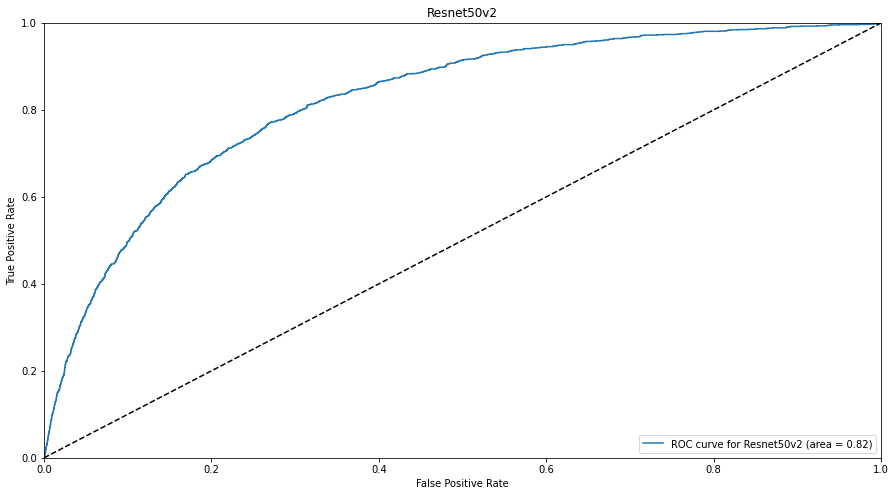

In [240]:
# Plot the ROC
# Plot ROC curve
plt.figure(figsize=(15, 8))
plt.clf()
plt.plot(fpr1, tpr1, label='ROC curve for Resnet50v2 (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Resnet50v2')
plt.legend(loc="lower right")
plt.show()

In [241]:
threshold:float = 0.5
predictions_list_threshold:list = [0 if prediction <= threshold else 1 for prediction in predictions_list]
over_all_f1_score = round(f1_score(actual_list,predictions_list_threshold, average='macro'),2)
print(f'The f1 score is {over_all_f1_score}')
print(
    f"The testing accuracy of best parameter  : {accuracy_score(actual_list,predictions_list_threshold)}"
)

data = (
    pd.DataFrame(classification_report(actual_list,predictions_list_threshold, output_dict=True))
    .T.reset_index()
    .iloc[:-3, :]
    .rename(columns={"index": "classes_name"}, inplace=False)
)
data

The f1 score is 0.67
The testing accuracy of best parameter  : 0.8120221855793734


classes_name  precision    recall  f1-score  support
0            0   0.833845  0.945820  0.886310   5168.0
1            1   0.653894  0.351963  0.457612   1503.0

In [242]:
cf_matrix = confusion_matrix(actual_list,predictions_list_threshold)
print(cf_matrix)

[[4888  280]
 [ 974  529]]


<AxesSubplot:>

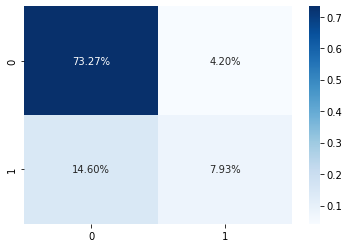

In [243]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

##### Test set

Dataset source!! validation set
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [193]:
path_normal = os.path.join(os.getcwd(),'dataset','test_set','test','NORMAL')
path_infected = os.path.join(os.getcwd(),'dataset','test_set','test','PNEUMONIA')

normal_file_names = list(os.listdir(path_normal))
inf_file_names = list(os.listdir(path_infected))

label_normal = [0]*len(normal_file_names)
label_inf = [1]*len(inf_file_names)

In [194]:
print(f'Number of samples of normal class : {len(normal_file_names)}')
print(f'Number of samples of pneumonia class : {len(inf_file_names)}')

Number of samples of normal class : 234
Number of samples of pneumonia class : 390


###### Normal cases

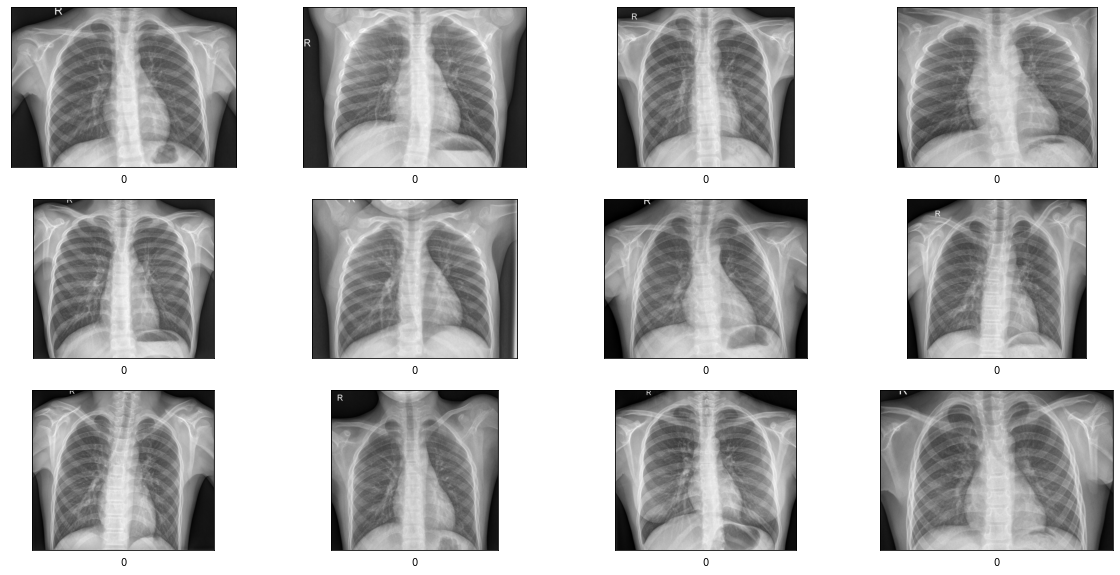

In [246]:
no_images:int = 12
plt.figure(figsize=(20,10))
num:int = 0
for file_name,label in zip(normal_file_names[0:no_images],label_normal[0:no_images]):
  num+=1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  pixel_values = pixels_values = cv2.imread(
        os.path.join(path_normal,file_name),0
        )
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(label)
plt.show()

###### images containing Pneumonia 

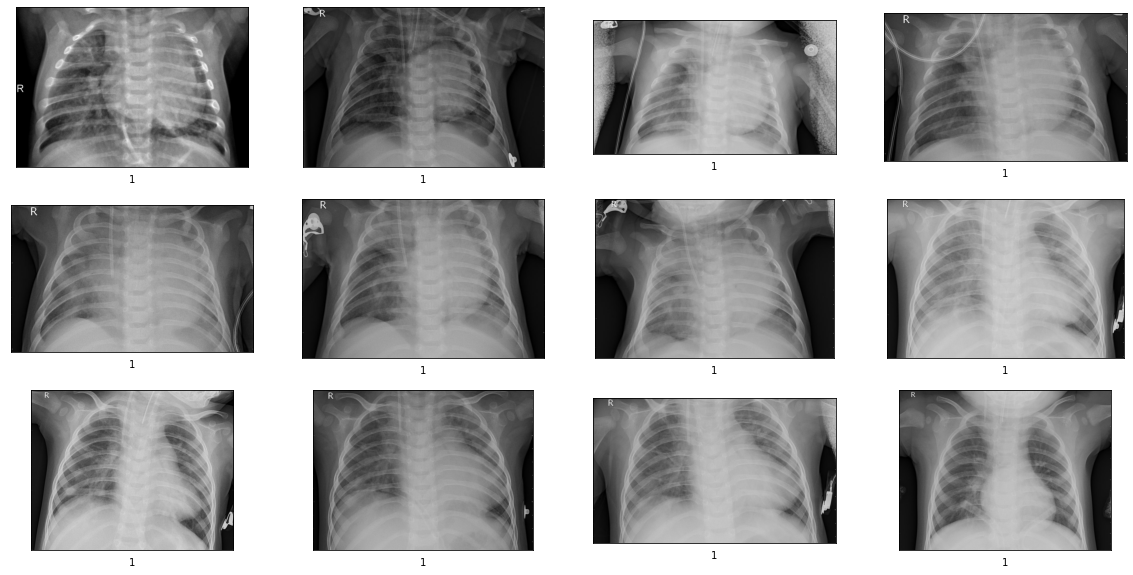

In [247]:
no_images:int = 12
plt.figure(figsize=(20,10))
num:int = 0
for file_name,label in zip(inf_file_names[0:no_images],label_inf[0:no_images]):
  num+=1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  pixel_values = pixels_values = cv2.imread(
        os.path.join(path_infected,file_name),0
        )
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(label)
plt.show()

In [248]:
images_names = normal_file_names+inf_file_names
labels = label_normal+label_inf 
def get_testImage():
    for file_name,label in zip(images_names,labels):
        if label == 0:
            file_path:str = os.path.join(path_normal,file_name)
        else:
            file_path:str = os.path.join(path_infected,file_name)
        
        pixels_values = cv2.imread(
        file_path,0
        )
        pixels_values:np.array = np.stack((pixels_values,) * 3, -1)
        #resizing the image
        pixels_values:np.array = cv2.resize(pixels_values, (224,224),interpolation = cv2.INTER_NEAREST).astype('float16')
        #scaling the image.
        pixels_values:np.array = pixels_values/pixels_values.max()
        yield pixels_values,label
    
test_iterator = tf.data.Dataset.from_generator(get_testImage,
                                                   output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
test_iterator = test_iterator.batch(batch_size=1)
predictions_list_test = []
actual_list_test = []
for batch in test_iterator:
    arr,la = batch
    predictions = resnetv250_finetuned_model.predict(arr)
    predictions_list_test.append(float(predictions[0]))
    actual_list_test.append(int(la))

1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 184ms/step


In [249]:
fpr1, tpr1, thresholds1 = roc_curve(actual_list_test,predictions_list_test)
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.849879


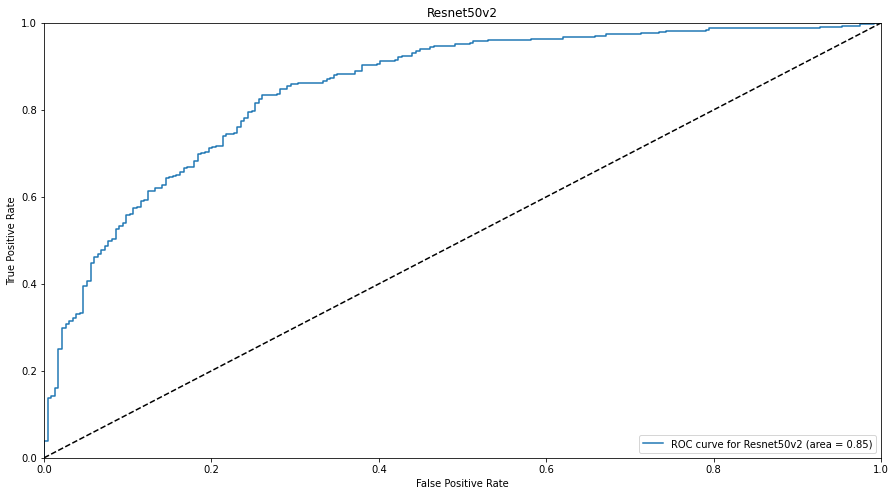

In [250]:
# Plot the ROC
# Plot ROC curve
plt.figure(figsize=(15, 8))
plt.clf()
plt.plot(fpr1, tpr1, label='ROC curve for Resnet50v2 (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Resnet50v2')
plt.legend(loc="lower right")
plt.show()

In [251]:
threshold:float = 0.5
predictions_list_threshold:list = [0 if prediction <= threshold else 1 for prediction in predictions_list_test]
over_all_f1_score = round(f1_score(actual_list_test,predictions_list_threshold, average='macro'),2)
print(f'The f1 score is {over_all_f1_score}')
print(
    f"The testing accuracy of best parameter  : {accuracy_score(actual_list_test,predictions_list_threshold)}"
)

data = (
    pd.DataFrame(classification_report(actual_list_test,predictions_list_threshold, output_dict=True))
    .T.reset_index()
    .iloc[:-3, :]
    .rename(columns={"index": "classes_name"}, inplace=False)
)
data

The f1 score is 0.57
The testing accuracy of best parameter  : 0.5801282051282052


classes_name  precision    recall  f1-score  support
0            0   0.470464  0.952991  0.629944    234.0
1            1   0.926667  0.356410  0.514815    390.0

In [252]:
print(f'Number of samples of normal class : {len(normal_file_names)}')
print(f'Number of samples of pneumonia class : {len(inf_file_names)}')

Number of samples of normal class : 234
Number of samples of pneumonia class : 390


In [253]:
cf_matrix = confusion_matrix(actual_list_test,predictions_list_threshold)
print(cf_matrix)

[[223  11]
 [251 139]]


<AxesSubplot:>

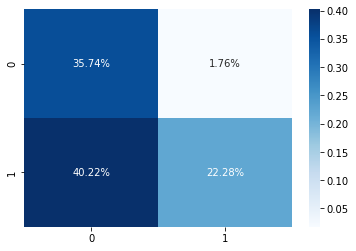

In [254]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

In [226]:
resnetv250_finetuned_model.save('resnet50v2classifier.h5')

In [ ]:
resnetv250_finetuned_model

In [212]:
resnetv250_finetuned_model

In [229]:
dd = {"sd":21}
list(dd.keys())

['sd']

### trainings with chestnet backbone with data agumentation

In [182]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip(mode="horizontal", seed=22),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1,0.2),
    layers.RandomBrightness(factor=[0.0,0.2]),
])

def basic_pre_processing(pixels_values):
    # pixels_values = cv2.cvtColor(pixels_values, cv2.COLOR_GRAY2RGB)
    #creating extra dimension
    pixels_values:np.array = np.stack((pixels_values,) * 3, -1)
    #resizing the image
    pixels_values:np.array = cv2.resize(pixels_values, (224,224),interpolation = cv2.INTER_NEAREST).astype('float16')
    #scaling the image.
    pixels_values:np.array = pixels_values/pixels_values.max()
    return pixels_values
    
def read_dicom(file_name):
    path_image:str = os.path.join(train_folder_path,file_name+'.dcm')
    dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
    pixels_values:np.array = dicom_obj.pixel_array
    return pixels_values
    
def get_trainImage_fromDicom():
    #getting the difference value of frequency between minor and major class. 
    class_distribution_target:pd.DataFrame = y_train.value_counts().reset_index().rename(columns = {'index':'class',
                                                                                 'Encoded_class':'frequency'}, inplace = False)
    difference_in_frequency = class_distribution_target.iloc[:,1][0] - class_distribution_target.iloc[:,1][1]
    difference_in_frequency
    count = 0
    for file_name,label in zip(x_train,y_train):
        #if the class label is pneumonia
        if label == 1 and count <= difference_in_frequency:
            #upsampling
            number_samples = [10,20,40,3,5,7,15,1,25,30,50,0]
            no_samples_generate = random.choice(number_samples)
            if no_samples_generate == 0:
                count+=1
                #reading the image.
                pixels_values = read_dicom(file_name)
                final_pixels_values = basic_pre_processing(pixels_values)
                yield final_pixels_values,label
            elif no_samples_generate == 1:
                #reading the image.
                pixels_values = read_dicom(file_name)
                processed_image = basic_pre_processing(pixels_values)
                final_pixels_values = data_augmentation(processed_image).numpy()
                count+=1
                yield final_pixels_values,label
            else:
                for sample_number in range(0,no_samples_generate):
                    #reading the image.
                    pixels_values = read_dicom(file_name)
                    processed_image = basic_pre_processing(pixels_values)
                    final_pixels_values = data_augmentation(processed_image).numpy()
                    count+=1
                    yield final_pixels_values,label
        else:
            #reading the image.
            pixels_values = read_dicom(file_name)
            final_pixels_values = basic_pre_processing(pixels_values)
            yield final_pixels_values,label
    
def get_testImage_fromDicom():
    for file_name,label in zip(x_test,y_test):
        #reading the image.
        pixels_values = read_dicom(file_name)
        pixels_values = basic_pre_processing(pixels_values)
        yield pixels_values,label

In [183]:
#hyper parameters
batch_size:int = 16
learning_rate:float = 0.001
decay_rate:float = 1e-6
epochs:int=100

train_set_iterator = tf.data.Dataset.from_generator(get_trainImage_fromDicom,
                                                    output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
test_set_iterator = tf.data.Dataset.from_generator(get_testImage_fromDicom,
                                                   output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
train_set_iterator = train_set_iterator.batch(batch_size=batch_size)
for batch in train_set_iterator:
  arr,la = batch
  print(arr.shape)
  break

test_set_iterator = test_set_iterator.batch(batch_size=batch_size) 
for batch in test_set_iterator:
  arr,la = batch
  print(arr.shape)
  break

(16, 224, 224, 3)
(16, 224, 224, 3)


In [169]:
# # flatten_layer = layers.Flatten()
# dense_net_121 = DenseNet121(input_shape=[224,224] + [3],include_top=False,pooling='avg')
# base_model_output = Dense(units=14,activation='relu')(dense_net_121.output)
# base_model = Model(inputs = dense_net_121.input,outputs=base_model_output)

# # loading pretrained weights 
# base_model.load_weights(chexnet_weights_path)
# output_layer = Dense(1,activation='sigmoid')(base_model.layers[-2].output)
# chexnet_121_model = Model(inputs=base_model.inputs, outputs=output_layer)

# inputs = tensorflow.keras.Input(shape=(224, 224, 3))
# x = tf.keras.applications.densenet.preprocess_input(inputs)
# output = chexnet_121_model(x)
# chexnet_121_model = Model(inputs = inputs,outputs=output)

In [184]:
# setting up base model 
dense_net_121 = DenseNet121(input_shape=[224,224] + [3],include_top=False,pooling='avg')
base_model_output = Dense(units=14,activation='relu')(dense_net_121.output)
base_model = Model(inputs = dense_net_121.input,outputs=base_model_output)
# loading pretrained weights 
base_model.load_weights(chexnet_weights_path)
output_layer = Dense(1,activation='sigmoid')(base_model.layers[-2].output)
chexnet_121_model = Model(inputs=base_model.inputs, outputs=output_layer)

In [185]:
chexnet_121_model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_32 (ZeroPadding  (None, 230, 230, 3)  0          ['input_22[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_32[0][0]']      
                                )                                                          

 conv2_block4_0_relu (Activatio  (None, 56, 56, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block10_concat (Concaten  (None, 28, 28, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
          

                                                                                                  
 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block7_0_relu (Activatio  (None, 14, 14, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_rel

 ization)                                                                                         
                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_blo

 conv5_block8_concat (Concatena  (None, 7, 7, 768)   0           ['conv5_block7_concat[0][0]',    
 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
          

 on)                                                                                              
                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

__________________________________________________________________________________________________


In [186]:
tf.random.set_seed(21)
number_of_layers = len(chexnet_121_model.layers)
number_last_layers_to_be_trainable = 70
count = 0

for layer in chexnet_121_model.layers:
    if count < (number_of_layers-number_last_layers_to_be_trainable):
        layer.trainable = False
        count+=1
    else:
        layer.trainable = True
        count+=1

In [187]:
adam = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate,decay=decay_rate)
chexnet_121_model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [188]:
save_model_path = os.path.join(os.getcwd(),
                              "saving_weights_training",
                              "classification",
                               "best_chexnet_model.h5")
def scheduler(epoch, lr):
  if epoch < 20:
    return lr
  else:
    return lr * tensorflow.math.exp(-0.1)

early_stopping = EarlyStopping(monitor='val_loss',mode = "min",patience=5)
model_checkpoint=tensorflow.keras.callbacks.ModelCheckpoint(save_model_path, 
                                                    save_best_only=True,
                                                    save_weights_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

lr_schedular = tensorflow.keras.callbacks.LearningRateScheduler(scheduler)
random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)

history = chexnet_121_model.fit(
  train_set_iterator,
  validation_data=test_set_iterator,
  batch_size=batch_size,
  epochs=epochs,
  callbacks=[early_stopping,model_checkpoint,lr_schedular],
  workers = 2*batch_size,
  verbose=1
)

Epoch 1/100
   1899/Unknown - 4938s 3s/step - loss: 0.2675 - accuracy: 0.8796
Epoch 1: val_accuracy improved from -inf to 0.83855, saving model to C:\Users\uUUUUvvvv\Desktop\projects\capstone_project\saving_weights_training\classification\best_chexnet_model.h5
1899/1899 [==============================] - 5881s 3s/step - loss: 0.2675 - accuracy: 0.8796 - val_loss: 0.3483 - val_accuracy: 0.8386 - lr: 0.0010
Epoch 2/100
1899/1899 [==============================] - ETA: 0s - loss: 0.2327 - accuracy: 0.8961
Epoch 2: val_accuracy improved from 0.83855 to 0.84290, saving model to C:\Users\uUUUUvvvv\Desktop\projects\capstone_project\saving_weights_training\classification\best_chexnet_model.h5
1899/1899 [==============================] - 5488s 3s/step - loss: 0.2327 - accuracy: 0.8961 - val_loss: 0.3447 - val_accuracy: 0.8429 - lr: 0.0010
Epoch 3/100
1899/1899 [==============================] - ETA: 0s - loss: 0.2221 - accuracy: 0.9010
Epoch 3: val_accuracy did not improve from 0.84290
1899/189


Epoch 6: val_accuracy did not improve from 0.84545
1899/1899 [==============================] - 3655s 2s/step - loss: 0.2077 - accuracy: 0.9073 - val_loss: 0.3453 - val_accuracy: 0.8417 - lr: 0.0010


In [206]:
history.history['accuracy']
training_logs:pd.DataFrame = pd.DataFrame({'training_accuracy_score':history.history['accuracy'],
             'validation_accuracy_score':history.history['val_accuracy'],
             'training_loss':history.history['loss'],
             'validation_loss':history.history['val_loss']})

training_logs.to_pickle(os.path.join(
    os.getcwd(),
    'training_classifier_logs.pkl'
))

In [208]:
pd.read_pickle(os.path.join(
    os.getcwd(),
    'training_classifier_logs.pkl'
))

training_accuracy_score  validation_accuracy_score  training_loss  \
0                 0.879622                   0.838555       0.267463   
1                 0.896097                   0.842902       0.232738   
2                 0.900968                   0.842902       0.222065   
3                 0.903239                   0.845450       0.215590   
4                 0.905575                   0.844551       0.212271   
5                 0.907291                   0.841703       0.207711   

   validation_loss  
0         0.348325  
1         0.344686  
2         0.345612  
3         0.342234  
4         0.343252  
5         0.345289

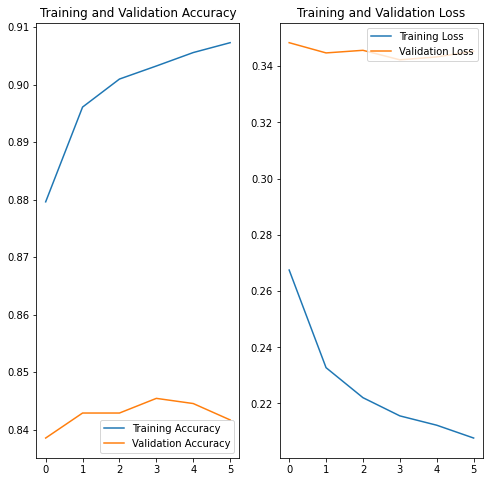

In [207]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range[:len(acc)], acc, label='Training Accuracy')
plt.plot(epochs_range[:len(acc)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[:len(acc)], loss, label='Training Loss')
plt.plot(epochs_range[:len(acc)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Validation part

In [2]:
from tensorflow.keras.applications.densenet import DenseNet121
# setting up base model 
dense_net_121 = DenseNet121(input_shape=[224,224] + [3],include_top=False,pooling='avg')
base_model_output = Dense(units=14,activation='relu')(dense_net_121.output)
base_model = Model(inputs = dense_net_121.input,outputs=base_model_output)
# loading pretrained weights 
base_model.load_weights(chexnet_weights_path)
output_layer = Dense(1,activation='sigmoid')(base_model.layers[-2].output)
chexnet_121_model = Model(inputs=base_model.inputs, outputs=output_layer)

chexnet_121_model.load_weights(save_model_path)

NameError: name 'Dense' is not defined

In [192]:
test_set_iterator = tf.data.Dataset.from_generator(get_testImage_fromDicom,
                                                   output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
test_set_iterator = test_set_iterator.batch(batch_size=1)
predictions_list = []
actual_list = []
for batch in test_set_iterator:
    arr,la = batch
    predictions = chexnet_121_model.predict(arr)
    print(predictions)
    predictions_list.append(float(predictions[0]))
    actual_list.append(int(la))

1/1 [==============================] - 2s 2s/step
[[0.56376064]]
1/1 [==============================] - 0s 120ms/step
[[0.01250611]]
1/1 [==============================] - 0s 108ms/step
[[0.5187644]]
1/1 [==============================] - 0s 109ms/step
[[0.13758276]]
1/1 [==============================] - 0s 119ms/step
[[0.07930451]]
1/1 [==============================] - 0s 107ms/step
[[0.2794657]]
1/1 [==============================] - 0s 116ms/step
[[0.00252344]]
1/1 [==============================] - 0s 109ms/step
[[0.27641118]]
1/1 [==============================] - 0s 104ms/step
[[0.02029826]]
1/1 [==============================] - 0s 100ms/step
[[0.00030583]]
1/1 [==============================] - 0s 102ms/step
[[0.60242593]]
1/1 [==============================] - 0s 103ms/step
[[0.09757188]]
1/1 [==============================] - 0s 225ms/step
[[0.01774773]]
1/1 [==============================] - 0s 245ms/step
[[0.06631855]]
1/1 [==============================] - 0s 249ms/step


1/1 [==============================] - 0s 125ms/step
[[0.02018102]]
1/1 [==============================] - 0s 127ms/step
[[0.39304218]]
1/1 [==============================] - 0s 139ms/step
[[0.7184635]]
1/1 [==============================] - 0s 120ms/step
[[0.41499075]]
1/1 [==============================] - 0s 313ms/step
[[0.11831456]]
1/1 [==============================] - 0s 318ms/step
[[0.10815186]]
1/1 [==============================] - 0s 222ms/step
[[0.05183295]]
1/1 [==============================] - 0s 294ms/step
[[0.5127236]]
1/1 [==============================] - 0s 294ms/step
[[0.2183614]]
1/1 [==============================] - 0s 251ms/step
[[0.02026714]]
1/1 [==============================] - 0s 255ms/step
[[0.61232924]]
1/1 [==============================] - 0s 290ms/step
[[0.22196138]]
1/1 [==============================] - 0s 234ms/step
[[0.819258]]
1/1 [==============================] - 0s 242ms/step
[[0.18243581]]
1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 229ms/step
[[0.00743736]]
1/1 [==============================] - 0s 226ms/step
[[0.847312]]
1/1 [==============================] - 0s 231ms/step
[[0.53501797]]
1/1 [==============================] - 0s 246ms/step
[[0.02041421]]
1/1 [==============================] - 0s 229ms/step
[[0.28019217]]
1/1 [==============================] - 0s 231ms/step
[[0.00953691]]
1/1 [==============================] - 0s 109ms/step
[[0.2188225]]
1/1 [==============================] - 0s 120ms/step
[[0.13930672]]
1/1 [==============================] - 0s 109ms/step
[[0.5451067]]
1/1 [==============================] - 0s 110ms/step
[[0.18238734]]
1/1 [==============================] - 0s 104ms/step
[[0.18395469]]
1/1 [==============================] - 0s 100ms/step
[[0.74961764]]
1/1 [==============================] - 0s 215ms/step
[[0.18179803]]
1/1 [==============================] - 0s 229ms/step
[[0.6037904]]
1/1 [==============================] - 0s 230ms/step


1/1 [==============================] - 0s 180ms/step
[[0.00267892]]
1/1 [==============================] - 0s 246ms/step
[[0.07336356]]
1/1 [==============================] - 0s 280ms/step
[[0.03042231]]
1/1 [==============================] - 0s 274ms/step
[[0.07818037]]
1/1 [==============================] - 0s 287ms/step
[[0.26768723]]
1/1 [==============================] - 0s 282ms/step
[[0.1416224]]
1/1 [==============================] - 0s 252ms/step
[[0.32737815]]
1/1 [==============================] - 0s 275ms/step
[[0.2255583]]
1/1 [==============================] - 0s 278ms/step
[[0.0796144]]
1/1 [==============================] - 0s 285ms/step
[[0.01240302]]
1/1 [==============================] - 0s 283ms/step
[[0.01455653]]
1/1 [==============================] - 0s 268ms/step
[[0.3777688]]
1/1 [==============================] - 0s 240ms/step
[[0.1846682]]
1/1 [==============================] - 0s 239ms/step
[[0.02112227]]
1/1 [==============================] - 0s 245ms/step


1/1 [==============================] - 0s 114ms/step
[[0.07361932]]
1/1 [==============================] - 0s 115ms/step
[[0.3494788]]
1/1 [==============================] - 0s 119ms/step
[[0.00020768]]
1/1 [==============================] - 0s 172ms/step
[[0.92015284]]
1/1 [==============================] - 0s 221ms/step
[[0.06588134]]
1/1 [==============================] - 0s 221ms/step
[[0.75095206]]
1/1 [==============================] - 0s 212ms/step
[[0.00551898]]
1/1 [==============================] - 0s 242ms/step
[[0.06387733]]
1/1 [==============================] - 0s 241ms/step
[[0.00236922]]
1/1 [==============================] - 0s 259ms/step
[[0.33199728]]
1/1 [==============================] - 0s 259ms/step
[[0.26159132]]
1/1 [==============================] - 0s 270ms/step
[[0.43192795]]
1/1 [==============================] - 0s 254ms/step
[[0.00240221]]
1/1 [==============================] - 0s 259ms/step
[[0.26098612]]
1/1 [==============================] - 0s 260ms/s

1/1 [==============================] - 0s 213ms/step
[[0.03672681]]
1/1 [==============================] - 0s 213ms/step
[[0.04087178]]
1/1 [==============================] - 0s 203ms/step
[[0.00328526]]
1/1 [==============================] - 0s 224ms/step
[[0.05319994]]
1/1 [==============================] - 0s 207ms/step
[[0.02961406]]
1/1 [==============================] - 0s 214ms/step
[[0.34825388]]
1/1 [==============================] - 0s 213ms/step
[[0.01884748]]
1/1 [==============================] - 0s 153ms/step
[[0.004381]]
1/1 [==============================] - 0s 102ms/step
[[0.29100323]]
1/1 [==============================] - 0s 108ms/step
[[0.07651152]]
1/1 [==============================] - 0s 104ms/step
[[0.49460885]]
1/1 [==============================] - 0s 110ms/step
[[0.01057922]]
1/1 [==============================] - 0s 99ms/step
[[0.20243676]]
1/1 [==============================] - 0s 106ms/step
[[0.01154134]]
1/1 [==============================] - 0s 101ms/ste

1/1 [==============================] - 0s 104ms/step
[[0.31916654]]
1/1 [==============================] - 0s 229ms/step
[[0.03621624]]
1/1 [==============================] - 0s 226ms/step
[[0.06875828]]
1/1 [==============================] - 0s 228ms/step
[[0.21313179]]
1/1 [==============================] - 0s 230ms/step
[[0.00247046]]
1/1 [==============================] - 0s 226ms/step
[[0.2968993]]
1/1 [==============================] - 0s 211ms/step
[[0.08558255]]
1/1 [==============================] - 0s 223ms/step
[[0.01479394]]
1/1 [==============================] - 0s 222ms/step
[[0.03041163]]
1/1 [==============================] - 0s 235ms/step
[[0.32062122]]
1/1 [==============================] - 0s 214ms/step
[[0.4593084]]
1/1 [==============================] - 0s 206ms/step
[[0.02455802]]
1/1 [==============================] - 0s 226ms/step
[[0.3426457]]
1/1 [==============================] - 0s 185ms/step
[[0.6845459]]
1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 206ms/step
[[0.10587212]]
1/1 [==============================] - 0s 215ms/step
[[0.00691342]]
1/1 [==============================] - 0s 218ms/step
[[0.12145481]]
1/1 [==============================] - 0s 202ms/step
[[0.15736656]]
1/1 [==============================] - 0s 217ms/step
[[0.01825228]]
1/1 [==============================] - 0s 217ms/step
[[0.5910045]]
1/1 [==============================] - 0s 229ms/step
[[0.31506085]]
1/1 [==============================] - 0s 214ms/step
[[0.57207906]]
1/1 [==============================] - 0s 209ms/step
[[0.27554798]]
1/1 [==============================] - 0s 216ms/step
[[0.4499872]]
1/1 [==============================] - 0s 217ms/step
[[0.81614983]]
1/1 [==============================] - 0s 100ms/step
[[0.27767554]]
1/1 [==============================] - 0s 105ms/step
[[0.02680811]]
1/1 [==============================] - 0s 96ms/step
[[0.5306727]]
1/1 [==============================] - 0s 107ms/step

1/1 [==============================] - 0s 203ms/step
[[0.06257278]]
1/1 [==============================] - 0s 215ms/step
[[0.49769017]]
1/1 [==============================] - 0s 247ms/step
[[0.25278997]]
1/1 [==============================] - 0s 216ms/step
[[0.05595361]]
1/1 [==============================] - 0s 215ms/step
[[0.2310517]]
1/1 [==============================] - 0s 214ms/step
[[0.7346306]]
1/1 [==============================] - 0s 203ms/step
[[0.04399878]]
1/1 [==============================] - 0s 217ms/step
[[0.69234985]]
1/1 [==============================] - 0s 215ms/step
[[0.6113272]]
1/1 [==============================] - 0s 215ms/step
[[0.26195383]]
1/1 [==============================] - 0s 214ms/step
[[0.06957816]]
1/1 [==============================] - 0s 214ms/step
[[0.05428191]]
1/1 [==============================] - 0s 217ms/step
[[0.8964226]]
1/1 [==============================] - 0s 216ms/step
[[0.02050393]]
1/1 [==============================] - 0s 217ms/step

1/1 [==============================] - 0s 111ms/step
[[0.17425396]]
1/1 [==============================] - 0s 98ms/step
[[0.0683575]]
1/1 [==============================] - 0s 107ms/step
[[0.01634401]]
1/1 [==============================] - 0s 129ms/step
[[0.5756029]]
1/1 [==============================] - 0s 221ms/step
[[0.81074685]]
1/1 [==============================] - 0s 218ms/step
[[0.00333703]]
1/1 [==============================] - 0s 228ms/step
[[0.01261408]]
1/1 [==============================] - 0s 214ms/step
[[0.31811264]]
1/1 [==============================] - 0s 218ms/step
[[0.00793649]]
1/1 [==============================] - 0s 224ms/step
[[0.00923269]]
1/1 [==============================] - 0s 219ms/step
[[0.23673826]]
1/1 [==============================] - 0s 230ms/step
[[0.4477606]]
1/1 [==============================] - 0s 220ms/step
[[0.10239355]]
1/1 [==============================] - 0s 216ms/step
[[0.48122072]]
1/1 [==============================] - 0s 205ms/step

1/1 [==============================] - 0s 261ms/step
[[0.22185914]]
1/1 [==============================] - 0s 264ms/step
[[0.16103849]]
1/1 [==============================] - 0s 260ms/step
[[0.64332885]]
1/1 [==============================] - 0s 261ms/step
[[0.03045529]]
1/1 [==============================] - 0s 260ms/step
[[0.04127637]]
1/1 [==============================] - 0s 253ms/step
[[0.02246982]]
1/1 [==============================] - 0s 256ms/step
[[0.0050807]]
1/1 [==============================] - 0s 217ms/step
[[0.41118127]]
1/1 [==============================] - 0s 259ms/step
[[0.04200982]]
1/1 [==============================] - 0s 256ms/step
[[0.18750714]]
1/1 [==============================] - 0s 259ms/step
[[0.00865085]]
1/1 [==============================] - 0s 206ms/step
[[0.2245956]]
1/1 [==============================] - 0s 133ms/step
[[0.7831709]]
1/1 [==============================] - 0s 115ms/step
[[0.47716]]
1/1 [==============================] - 0s 99ms/step
[[

1/1 [==============================] - 0s 255ms/step
[[0.02366566]]
1/1 [==============================] - 0s 257ms/step
[[0.4434561]]
1/1 [==============================] - 0s 226ms/step
[[0.27750525]]
1/1 [==============================] - 0s 209ms/step
[[0.134608]]
1/1 [==============================] - 0s 221ms/step
[[0.01110768]]
1/1 [==============================] - 0s 217ms/step
[[0.24654345]]
1/1 [==============================] - 0s 216ms/step
[[0.00165222]]
1/1 [==============================] - 0s 214ms/step
[[0.00789856]]
1/1 [==============================] - 0s 249ms/step
[[0.01204795]]
1/1 [==============================] - 0s 229ms/step
[[0.01648646]]
1/1 [==============================] - 0s 138ms/step
[[0.00893341]]
1/1 [==============================] - 0s 102ms/step
[[0.10880212]]
1/1 [==============================] - 0s 137ms/step
[[0.00171373]]
1/1 [==============================] - 0s 133ms/step
[[0.27754596]]
1/1 [==============================] - 0s 108ms/ste

[[0.31919318]]
1/1 [==============================] - 0s 217ms/step
[[0.4938818]]
1/1 [==============================] - 0s 114ms/step
[[0.06788226]]
1/1 [==============================] - 0s 133ms/step
[[0.00862048]]
1/1 [==============================] - 0s 132ms/step
[[0.20157002]]
1/1 [==============================] - 0s 135ms/step
[[0.00109169]]
1/1 [==============================] - 0s 134ms/step
[[0.3045378]]
1/1 [==============================] - 0s 178ms/step
[[0.5179549]]
1/1 [==============================] - 0s 257ms/step
[[0.00600887]]
1/1 [==============================] - 0s 265ms/step
[[0.5630801]]
1/1 [==============================] - 0s 254ms/step
[[0.44065434]]
1/1 [==============================] - 0s 253ms/step
[[0.23836161]]
1/1 [==============================] - 0s 254ms/step
[[0.00975485]]
1/1 [==============================] - 0s 247ms/step
[[0.00374242]]
1/1 [==============================] - 0s 240ms/step
[[0.00180569]]
1/1 [==============================] 

1/1 [==============================] - 0s 233ms/step
[[0.03973847]]
1/1 [==============================] - 0s 221ms/step
[[0.3845325]]
1/1 [==============================] - 0s 215ms/step
[[0.07766003]]
1/1 [==============================] - 0s 209ms/step
[[0.14086153]]
1/1 [==============================] - 0s 249ms/step
[[0.48012868]]
1/1 [==============================] - 0s 221ms/step
[[0.13218005]]
1/1 [==============================] - 0s 227ms/step
[[0.30198497]]
1/1 [==============================] - 0s 226ms/step
[[0.36712745]]
1/1 [==============================] - 0s 226ms/step
[[0.01301014]]
1/1 [==============================] - 0s 233ms/step
[[0.5070977]]
1/1 [==============================] - 0s 227ms/step
[[0.1069758]]
1/1 [==============================] - 0s 248ms/step
[[0.22633219]]
1/1 [==============================] - 0s 282ms/step
[[0.04224902]]
1/1 [==============================] - 0s 171ms/step
[[0.0051859]]
1/1 [==============================] - 0s 121ms/step

1/1 [==============================] - 0s 289ms/step
[[0.6665191]]
1/1 [==============================] - 0s 286ms/step
[[0.04204173]]
1/1 [==============================] - 0s 288ms/step
[[0.01066207]]
1/1 [==============================] - 0s 275ms/step
[[0.21030049]]
1/1 [==============================] - 0s 233ms/step
[[0.5035732]]
1/1 [==============================] - 0s 226ms/step
[[0.00112307]]
1/1 [==============================] - 0s 238ms/step
[[0.17752688]]
1/1 [==============================] - 0s 219ms/step
[[0.0188686]]
1/1 [==============================] - 0s 217ms/step
[[0.01600892]]
1/1 [==============================] - 0s 230ms/step
[[0.13371918]]
1/1 [==============================] - 0s 224ms/step
[[0.02648139]]
1/1 [==============================] - 0s 233ms/step
[[0.00183206]]
1/1 [==============================] - 0s 206ms/step
[[0.513677]]
1/1 [==============================] - 0s 121ms/step
[[0.02765193]]
1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 247ms/step
[[0.19350527]]
1/1 [==============================] - 0s 235ms/step
[[0.01764688]]
1/1 [==============================] - 0s 232ms/step
[[0.01339142]]
1/1 [==============================] - 0s 233ms/step
[[0.01709795]]
1/1 [==============================] - 0s 221ms/step
[[0.06607352]]
1/1 [==============================] - 0s 228ms/step
[[0.20436297]]
1/1 [==============================] - 0s 239ms/step
[[0.09635734]]
1/1 [==============================] - 0s 225ms/step
[[0.05113803]]
1/1 [==============================] - 0s 233ms/step
[[0.5002762]]
1/1 [==============================] - 0s 216ms/step
[[0.00326014]]
1/1 [==============================] - 0s 219ms/step
[[0.00384032]]
1/1 [==============================] - 0s 249ms/step
[[0.14759639]]
1/1 [==============================] - 0s 215ms/step
[[0.00506344]]
1/1 [==============================] - 0s 218ms/step
[[0.00823206]]
1/1 [==============================] - 0s 218ms/s

1/1 [==============================] - 0s 212ms/step
[[0.41404122]]
1/1 [==============================] - 0s 212ms/step
[[0.38760412]]
1/1 [==============================] - 0s 212ms/step
[[0.46302575]]
1/1 [==============================] - 0s 197ms/step
[[0.10398007]]
1/1 [==============================] - 0s 196ms/step
[[0.4687521]]
1/1 [==============================] - 0s 212ms/step
[[0.01153167]]
1/1 [==============================] - 0s 197ms/step
[[0.79865634]]
1/1 [==============================] - 0s 210ms/step
[[0.43573323]]
1/1 [==============================] - 0s 211ms/step
[[0.01847404]]
1/1 [==============================] - 0s 213ms/step
[[0.09242515]]
1/1 [==============================] - 0s 212ms/step
[[0.13738613]]
1/1 [==============================] - 0s 211ms/step
[[0.02635132]]
1/1 [==============================] - 0s 209ms/step
[[0.843078]]
1/1 [==============================] - 0s 212ms/step
[[0.00647567]]
1/1 [==============================] - 0s 213ms/ste

1/1 [==============================] - 0s 212ms/step
[[0.0039233]]
1/1 [==============================] - 0s 219ms/step
[[0.0019807]]
1/1 [==============================] - 0s 212ms/step
[[0.3762643]]
1/1 [==============================] - 0s 211ms/step
[[0.00485606]]
1/1 [==============================] - 0s 213ms/step
[[0.00918154]]
1/1 [==============================] - 0s 228ms/step
[[0.00025551]]
1/1 [==============================] - 0s 217ms/step
[[0.07968104]]
1/1 [==============================] - 0s 242ms/step
[[0.01016381]]
1/1 [==============================] - 0s 263ms/step
[[0.00163136]]
1/1 [==============================] - 0s 234ms/step
[[0.10429136]]
1/1 [==============================] - 0s 223ms/step
[[0.27444908]]
1/1 [==============================] - 0s 224ms/step
[[0.02641324]]
1/1 [==============================] - 0s 241ms/step
[[0.0025229]]
1/1 [==============================] - 0s 216ms/step
[[0.00318155]]
1/1 [==============================] - 0s 228ms/step

1/1 [==============================] - 0s 228ms/step
[[0.00254461]]
1/1 [==============================] - 0s 115ms/step
[[0.30129728]]
1/1 [==============================] - 0s 125ms/step
[[0.35747084]]
1/1 [==============================] - 0s 109ms/step
[[0.00323881]]
1/1 [==============================] - 0s 109ms/step
[[0.17994602]]
1/1 [==============================] - 0s 109ms/step
[[0.62293476]]
1/1 [==============================] - 0s 109ms/step
[[0.08675368]]
1/1 [==============================] - 0s 109ms/step
[[0.84078103]]
1/1 [==============================] - 0s 109ms/step
[[0.00525177]]
1/1 [==============================] - 0s 121ms/step
[[0.32790762]]
1/1 [==============================] - 0s 125ms/step
[[0.7459029]]
1/1 [==============================] - 0s 121ms/step
[[0.0134403]]
1/1 [==============================] - 0s 116ms/step
[[0.45193836]]
1/1 [==============================] - 0s 172ms/step
[[0.03541902]]
1/1 [==============================] - 0s 243ms/st

1/1 [==============================] - 0s 211ms/step
[[0.13432191]]
1/1 [==============================] - 0s 212ms/step
[[0.00735005]]
1/1 [==============================] - 0s 219ms/step
[[0.42228106]]
1/1 [==============================] - 0s 230ms/step
[[0.00664981]]
1/1 [==============================] - 0s 264ms/step
[[0.11788177]]
1/1 [==============================] - 0s 224ms/step
[[0.8892368]]
1/1 [==============================] - 0s 228ms/step
[[0.06706414]]
1/1 [==============================] - 0s 242ms/step
[[0.0818869]]
1/1 [==============================] - 0s 219ms/step
[[0.45153207]]
1/1 [==============================] - 0s 228ms/step
[[0.00851308]]
1/1 [==============================] - 0s 257ms/step
[[0.05429156]]
1/1 [==============================] - 0s 197ms/step
[[0.01363901]]
1/1 [==============================] - 0s 136ms/step
[[0.5495118]]
1/1 [==============================] - 0s 111ms/step
[[0.12988316]]
1/1 [==============================] - 0s 134ms/ste

1/1 [==============================] - 0s 213ms/step
[[0.00631632]]
1/1 [==============================] - 0s 212ms/step
[[0.04918289]]
1/1 [==============================] - 0s 228ms/step
[[0.01416248]]
1/1 [==============================] - 0s 229ms/step
[[0.8368569]]
1/1 [==============================] - 0s 231ms/step
[[0.02230952]]
1/1 [==============================] - 0s 230ms/step
[[0.01384538]]
1/1 [==============================] - 0s 207ms/step
[[0.06165196]]
1/1 [==============================] - 0s 260ms/step
[[0.02401282]]
1/1 [==============================] - 0s 241ms/step
[[0.06967272]]
1/1 [==============================] - 0s 199ms/step
[[0.45246887]]
1/1 [==============================] - 0s 107ms/step
[[0.17903592]]
1/1 [==============================] - 0s 109ms/step
[[0.02129438]]
1/1 [==============================] - 0s 106ms/step
[[0.43533245]]
1/1 [==============================] - 0s 102ms/step
[[0.00741107]]
1/1 [==============================] - 0s 107ms/s

1/1 [==============================] - 0s 236ms/step
[[0.01852468]]
1/1 [==============================] - 0s 245ms/step
[[0.00531004]]
1/1 [==============================] - 0s 275ms/step
[[0.03359975]]
1/1 [==============================] - 0s 295ms/step
[[0.03269493]]
1/1 [==============================] - 0s 222ms/step
[[0.09279621]]
1/1 [==============================] - 0s 255ms/step
[[0.00815992]]
1/1 [==============================] - 0s 230ms/step
[[0.00056636]]
1/1 [==============================] - 0s 233ms/step
[[0.1309751]]
1/1 [==============================] - 0s 151ms/step
[[0.8229514]]
1/1 [==============================] - 0s 115ms/step
[[0.04456783]]
1/1 [==============================] - 0s 116ms/step
[[0.0044693]]
1/1 [==============================] - 0s 114ms/step
[[0.03376585]]
1/1 [==============================] - 0s 100ms/step
[[0.77003276]]
1/1 [==============================] - 0s 119ms/step
[[0.8882205]]
1/1 [==============================] - 0s 150ms/step

1/1 [==============================] - 0s 212ms/step
[[0.01486885]]
1/1 [==============================] - 0s 226ms/step
[[0.00206718]]
1/1 [==============================] - 0s 211ms/step
[[0.6136215]]
1/1 [==============================] - 0s 228ms/step
[[0.0215013]]
1/1 [==============================] - 0s 213ms/step
[[0.01973457]]
1/1 [==============================] - 0s 227ms/step
[[0.70582366]]
1/1 [==============================] - 0s 212ms/step
[[0.04462968]]
1/1 [==============================] - 0s 212ms/step
[[0.4611561]]
1/1 [==============================] - 0s 116ms/step
[[0.01654306]]
1/1 [==============================] - 0s 109ms/step
[[0.11857737]]
1/1 [==============================] - 0s 109ms/step
[[0.26643723]]
1/1 [==============================] - 0s 109ms/step
[[0.5600588]]
1/1 [==============================] - 0s 109ms/step
[[0.00541381]]
1/1 [==============================] - 0s 114ms/step
[[0.17616922]]
1/1 [==============================] - 0s 176ms/step

1/1 [==============================] - 0s 251ms/step
[[0.0926434]]
1/1 [==============================] - 0s 259ms/step
[[0.03672843]]
1/1 [==============================] - 0s 251ms/step
[[0.3190231]]
1/1 [==============================] - 0s 253ms/step
[[0.03969673]]
1/1 [==============================] - 0s 255ms/step
[[0.39321095]]
1/1 [==============================] - 0s 258ms/step
[[0.1025819]]
1/1 [==============================] - 0s 240ms/step
[[0.01384789]]
1/1 [==============================] - 0s 235ms/step
[[0.42432892]]
1/1 [==============================] - 0s 239ms/step
[[0.03682084]]
1/1 [==============================] - 0s 249ms/step
[[0.14407659]]
1/1 [==============================] - 0s 225ms/step
[[0.00308295]]
1/1 [==============================] - 0s 228ms/step
[[0.17070621]]
1/1 [==============================] - 0s 234ms/step
[[0.00542127]]
1/1 [==============================] - 0s 185ms/step
[[0.04520322]]
1/1 [==============================] - 0s 118ms/ste

1/1 [==============================] - 0s 293ms/step
[[0.12164572]]
1/1 [==============================] - 0s 310ms/step
[[0.0970225]]
1/1 [==============================] - 0s 325ms/step
[[0.00909502]]
1/1 [==============================] - 0s 275ms/step
[[0.07245834]]
1/1 [==============================] - 0s 280ms/step
[[0.28425136]]
1/1 [==============================] - 0s 274ms/step
[[0.14863732]]
1/1 [==============================] - 0s 292ms/step
[[0.02583781]]
1/1 [==============================] - 0s 132ms/step
[[0.38409784]]
1/1 [==============================] - 0s 143ms/step
[[0.01209054]]
1/1 [==============================] - 0s 126ms/step
[[0.04586902]]
1/1 [==============================] - 0s 141ms/step
[[0.01027705]]
1/1 [==============================] - 0s 141ms/step
[[0.39833957]]
1/1 [==============================] - 0s 257ms/step
[[0.00302637]]
1/1 [==============================] - 0s 274ms/step
[[0.5075968]]
1/1 [==============================] - 0s 274ms/st

1/1 [==============================] - 0s 128ms/step
[[0.00333068]]
1/1 [==============================] - 0s 149ms/step
[[0.10366466]]
1/1 [==============================] - 0s 153ms/step
[[0.00676829]]
1/1 [==============================] - 0s 146ms/step
[[0.3456653]]
1/1 [==============================] - 0s 162ms/step
[[0.51936316]]
1/1 [==============================] - 0s 265ms/step
[[0.25530297]]
1/1 [==============================] - 0s 283ms/step
[[0.03531776]]
1/1 [==============================] - 0s 284ms/step
[[0.34806222]]
1/1 [==============================] - 0s 294ms/step
[[0.0075153]]
1/1 [==============================] - 0s 316ms/step
[[0.00666952]]
1/1 [==============================] - 0s 280ms/step
[[0.01474404]]
1/1 [==============================] - 0s 283ms/step
[[0.58220387]]
1/1 [==============================] - 0s 278ms/step
[[0.0011837]]
1/1 [==============================] - 0s 278ms/step
[[0.00138933]]
1/1 [==============================] - 0s 280ms/ste

1/1 [==============================] - 0s 125ms/step
[[0.16124228]]
1/1 [==============================] - 0s 125ms/step
[[0.02768121]]
1/1 [==============================] - 0s 141ms/step
[[0.00102536]]
1/1 [==============================] - 0s 125ms/step
[[0.12524232]]
1/1 [==============================] - 0s 125ms/step
[[0.01034374]]
1/1 [==============================] - 0s 125ms/step
[[0.02083264]]
1/1 [==============================] - 0s 125ms/step
[[0.6637593]]
1/1 [==============================] - 0s 125ms/step
[[0.00245478]]
1/1 [==============================] - 0s 203ms/step
[[0.3223123]]
1/1 [==============================] - 0s 296ms/step
[[0.00615552]]
1/1 [==============================] - 0s 277ms/step
[[0.06469317]]
1/1 [==============================] - 0s 273ms/step
[[0.01018761]]
1/1 [==============================] - 0s 275ms/step
[[0.03646303]]
1/1 [==============================] - 0s 274ms/step
[[0.1014628]]
1/1 [==============================] - 0s 274ms/ste

1/1 [==============================] - 0s 275ms/step
[[0.51851004]]
1/1 [==============================] - 0s 284ms/step
[[0.8825705]]
1/1 [==============================] - 0s 229ms/step
[[0.31140974]]
1/1 [==============================] - 0s 160ms/step
[[0.04975589]]
1/1 [==============================] - 0s 120ms/step
[[0.63231885]]
1/1 [==============================] - 0s 141ms/step
[[0.06145459]]
1/1 [==============================] - 0s 304ms/step
[[0.00293829]]
1/1 [==============================] - 0s 278ms/step
[[0.5531716]]
1/1 [==============================] - 0s 279ms/step
[[0.07095058]]
1/1 [==============================] - 0s 274ms/step
[[0.26190892]]
1/1 [==============================] - 0s 274ms/step
[[0.29714495]]
1/1 [==============================] - 0s 274ms/step
[[0.05992873]]
1/1 [==============================] - 0s 326ms/step
[[0.5964909]]
1/1 [==============================] - 0s 292ms/step
[[0.05973432]]
1/1 [==============================] - 0s 328ms/ste

1/1 [==============================] - 0s 125ms/step
[[0.18165076]]
1/1 [==============================] - 0s 125ms/step
[[0.03288088]]
1/1 [==============================] - 0s 125ms/step
[[0.03943289]]
1/1 [==============================] - 0s 147ms/step
[[0.00122114]]
1/1 [==============================] - 0s 263ms/step
[[0.00782264]]
1/1 [==============================] - 0s 256ms/step
[[0.14941242]]
1/1 [==============================] - 0s 270ms/step
[[0.26280317]]
1/1 [==============================] - 0s 276ms/step
[[0.00995129]]
1/1 [==============================] - 0s 274ms/step
[[0.05652811]]
1/1 [==============================] - 0s 258ms/step
[[0.00831704]]
1/1 [==============================] - 0s 261ms/step
[[0.654531]]
1/1 [==============================] - 0s 274ms/step
[[0.43198627]]
1/1 [==============================] - 0s 211ms/step
[[0.00806177]]
1/1 [==============================] - 0s 141ms/step
[[0.00446811]]
1/1 [==============================] - 0s 125ms/st

1/1 [==============================] - 0s 260ms/step
[[0.6420055]]
1/1 [==============================] - 0s 259ms/step
[[0.17633796]]
1/1 [==============================] - 0s 259ms/step
[[0.01584834]]
1/1 [==============================] - 0s 258ms/step
[[0.2191965]]
1/1 [==============================] - 0s 258ms/step
[[0.40881878]]
1/1 [==============================] - 0s 258ms/step
[[0.43790027]]
1/1 [==============================] - 0s 258ms/step
[[0.01673133]]
1/1 [==============================] - 0s 258ms/step
[[0.18250304]]
1/1 [==============================] - 0s 274ms/step
[[0.00589934]]
1/1 [==============================] - 0s 274ms/step
[[0.00401343]]
1/1 [==============================] - 0s 302ms/step
[[0.00327747]]
1/1 [==============================] - 0s 290ms/step
[[0.3468239]]
1/1 [==============================] - 0s 258ms/step
[[0.08886215]]
1/1 [==============================] - 0s 258ms/step
[[0.10977244]]
1/1 [==============================] - 0s 259ms/ste

1/1 [==============================] - 0s 244ms/step
[[0.09007681]]
1/1 [==============================] - 0s 258ms/step
[[0.8355484]]
1/1 [==============================] - 0s 266ms/step
[[0.5869136]]
1/1 [==============================] - 0s 259ms/step
[[0.07692528]]
1/1 [==============================] - 0s 244ms/step
[[0.03674363]]
1/1 [==============================] - 0s 243ms/step
[[0.9065572]]
1/1 [==============================] - 0s 258ms/step
[[0.02128343]]
1/1 [==============================] - 0s 258ms/step
[[0.22721215]]
1/1 [==============================] - 0s 242ms/step
[[0.11750494]]
1/1 [==============================] - 0s 277ms/step
[[0.3600858]]
1/1 [==============================] - 0s 259ms/step
[[0.06053551]]
1/1 [==============================] - 0s 258ms/step
[[0.23359002]]
1/1 [==============================] - 0s 259ms/step
[[0.00424934]]
1/1 [==============================] - 0s 259ms/step
[[0.2963494]]
1/1 [==============================] - 0s 260ms/step


1/1 [==============================] - 0s 259ms/step
[[0.5246272]]
1/1 [==============================] - 0s 259ms/step
[[0.5831883]]
1/1 [==============================] - 0s 259ms/step
[[0.01618449]]
1/1 [==============================] - 0s 258ms/step
[[0.02660492]]
1/1 [==============================] - 0s 287ms/step
[[0.02222192]]
1/1 [==============================] - 0s 281ms/step
[[0.26602033]]
1/1 [==============================] - 0s 250ms/step
[[0.06020978]]
1/1 [==============================] - 0s 266ms/step
[[0.9220963]]
1/1 [==============================] - 0s 276ms/step
[[0.2058806]]
1/1 [==============================] - 0s 273ms/step
[[0.75438106]]
1/1 [==============================] - 0s 259ms/step
[[0.00174938]]
1/1 [==============================] - 0s 259ms/step
[[0.22413513]]
1/1 [==============================] - 0s 258ms/step
[[0.12139976]]
1/1 [==============================] - 0s 260ms/step
[[0.18412544]]
1/1 [==============================] - 0s 269ms/step

1/1 [==============================] - 0s 243ms/step
[[0.15357107]]
1/1 [==============================] - 0s 243ms/step
[[0.09268038]]
1/1 [==============================] - 0s 243ms/step
[[0.05120831]]
1/1 [==============================] - 0s 250ms/step
[[0.03653688]]
1/1 [==============================] - 0s 242ms/step
[[0.00623684]]
1/1 [==============================] - 0s 258ms/step
[[0.00183078]]
1/1 [==============================] - 0s 242ms/step
[[0.36925346]]
1/1 [==============================] - 0s 242ms/step
[[0.0025348]]
1/1 [==============================] - 0s 259ms/step
[[0.14599897]]
1/1 [==============================] - 0s 259ms/step
[[0.01424199]]
1/1 [==============================] - 0s 257ms/step
[[0.00640387]]
1/1 [==============================] - 0s 257ms/step
[[0.2802805]]
1/1 [==============================] - 0s 259ms/step
[[0.31359243]]
1/1 [==============================] - 0s 243ms/step
[[0.6928076]]
1/1 [==============================] - 0s 258ms/ste

1/1 [==============================] - 0s 251ms/step
[[0.00464317]]
1/1 [==============================] - 0s 286ms/step
[[0.00327591]]
1/1 [==============================] - 0s 295ms/step
[[0.30038595]]
1/1 [==============================] - 0s 279ms/step
[[0.00938082]]
1/1 [==============================] - 0s 299ms/step
[[0.43114328]]
1/1 [==============================] - 0s 283ms/step
[[0.02152014]]
1/1 [==============================] - 0s 299ms/step
[[0.5212398]]
1/1 [==============================] - 0s 297ms/step
[[0.07466415]]
1/1 [==============================] - 0s 294ms/step
[[0.3752956]]
1/1 [==============================] - 0s 297ms/step
[[0.30159637]]
1/1 [==============================] - 0s 295ms/step
[[0.49866617]]
1/1 [==============================] - 0s 295ms/step
[[0.4922483]]
1/1 [==============================] - 0s 259ms/step
[[0.0330818]]
1/1 [==============================] - 0s 279ms/step
[[0.07103432]]
1/1 [==============================] - 0s 297ms/step

[[0.03485584]]
1/1 [==============================] - 0s 273ms/step
[[0.00334259]]
1/1 [==============================] - 0s 268ms/step
[[0.02916673]]
1/1 [==============================] - 0s 270ms/step
[[0.00676665]]
1/1 [==============================] - 0s 255ms/step
[[0.0945719]]
1/1 [==============================] - 0s 258ms/step
[[0.00780705]]
1/1 [==============================] - 0s 282ms/step
[[0.07336763]]
1/1 [==============================] - 0s 263ms/step
[[0.40341708]]
1/1 [==============================] - 0s 281ms/step
[[0.00419286]]
1/1 [==============================] - 0s 267ms/step
[[0.9055902]]
1/1 [==============================] - 0s 260ms/step
[[0.0615169]]
1/1 [==============================] - 0s 293ms/step
[[0.54698205]]
1/1 [==============================] - 0s 311ms/step
[[0.0664461]]
1/1 [==============================] - 0s 285ms/step
[[0.04665707]]
1/1 [==============================] - 0s 279ms/step
[[0.04849697]]
1/1 [==============================] 

[[0.29428476]]
1/1 [==============================] - 0s 243ms/step
[[0.01810837]]
1/1 [==============================] - 0s 244ms/step
[[0.00301028]]
1/1 [==============================] - 0s 258ms/step
[[0.1443608]]
1/1 [==============================] - 0s 243ms/step
[[0.3998512]]
1/1 [==============================] - 0s 243ms/step
[[0.14903599]]
1/1 [==============================] - 0s 243ms/step
[[0.09396436]]
1/1 [==============================] - 0s 242ms/step
[[0.508331]]
1/1 [==============================] - 0s 242ms/step
[[0.00523091]]
1/1 [==============================] - 0s 242ms/step
[[0.09128692]]
1/1 [==============================] - 0s 243ms/step
[[0.23192307]]
1/1 [==============================] - 0s 260ms/step
[[0.02147116]]
1/1 [==============================] - 0s 243ms/step
[[0.05831633]]
1/1 [==============================] - 0s 244ms/step
[[0.02653519]]
1/1 [==============================] - 0s 243ms/step
[[0.32524288]]
1/1 [==============================] 

[[0.4318997]]
1/1 [==============================] - 0s 260ms/step
[[0.03780144]]
1/1 [==============================] - 0s 243ms/step
[[0.11956976]]
1/1 [==============================] - 0s 242ms/step
[[0.00848525]]
1/1 [==============================] - 0s 244ms/step
[[0.32098803]]
1/1 [==============================] - 0s 243ms/step
[[0.02136036]]
1/1 [==============================] - 0s 243ms/step
[[0.14051399]]
1/1 [==============================] - 0s 233ms/step
[[0.06056327]]
1/1 [==============================] - 0s 244ms/step
[[0.00375052]]
1/1 [==============================] - 0s 243ms/step
[[0.22810185]]
1/1 [==============================] - 0s 258ms/step
[[0.44823468]]
1/1 [==============================] - 0s 243ms/step
[[0.6452933]]
1/1 [==============================] - 0s 242ms/step
[[0.00159088]]
1/1 [==============================] - 0s 242ms/step
[[0.01475509]]
1/1 [==============================] - 0s 243ms/step
[[0.00175597]]
1/1 [==============================

1/1 [==============================] - 0s 228ms/step
[[0.00316644]]
1/1 [==============================] - 0s 246ms/step
[[0.08498847]]
1/1 [==============================] - 0s 248ms/step
[[0.00428776]]
1/1 [==============================] - 0s 228ms/step
[[0.01379673]]
1/1 [==============================] - 0s 242ms/step
[[0.04059374]]
1/1 [==============================] - 0s 279ms/step
[[0.45113093]]
1/1 [==============================] - 0s 253ms/step
[[0.06015509]]
1/1 [==============================] - 0s 232ms/step
[[0.49903074]]
1/1 [==============================] - 0s 244ms/step
[[0.2779292]]
1/1 [==============================] - 0s 227ms/step
[[0.01268342]]
1/1 [==============================] - 0s 244ms/step
[[0.13932687]]
1/1 [==============================] - 0s 243ms/step
[[0.7975484]]
1/1 [==============================] - 0s 244ms/step
[[0.00493254]]
1/1 [==============================] - 0s 243ms/step
[[0.34629622]]
1/1 [==============================] - 0s 252ms/st

1/1 [==============================] - 0s 227ms/step
[[0.47777677]]
1/1 [==============================] - 0s 227ms/step
[[0.01571276]]
1/1 [==============================] - 0s 258ms/step
[[0.48202795]]
1/1 [==============================] - 0s 243ms/step
[[0.10574792]]
1/1 [==============================] - 0s 228ms/step
[[0.3249195]]
1/1 [==============================] - 0s 226ms/step
[[0.280242]]
1/1 [==============================] - 0s 227ms/step
[[0.6601668]]
1/1 [==============================] - 0s 227ms/step
[[0.03729328]]
1/1 [==============================] - 0s 227ms/step
[[0.00199464]]
1/1 [==============================] - 0s 244ms/step
[[0.04349983]]
1/1 [==============================] - 0s 228ms/step
[[0.05778608]]
1/1 [==============================] - 0s 243ms/step
[[0.00361586]]
1/1 [==============================] - 0s 227ms/step
[[0.5134719]]
1/1 [==============================] - 0s 242ms/step
[[0.02776796]]
1/1 [==============================] - 0s 234ms/step


1/1 [==============================] - 0s 187ms/step
[[0.00878409]]
1/1 [==============================] - 0s 227ms/step
[[0.6737724]]
1/1 [==============================] - 0s 228ms/step
[[0.24099566]]
1/1 [==============================] - 0s 243ms/step
[[0.17044128]]
1/1 [==============================] - 0s 227ms/step
[[0.7870859]]
1/1 [==============================] - 0s 227ms/step
[[0.2589278]]
1/1 [==============================] - 0s 242ms/step
[[0.01026498]]
1/1 [==============================] - 0s 227ms/step
[[0.0215004]]
1/1 [==============================] - 0s 227ms/step
[[0.5777739]]
1/1 [==============================] - 0s 243ms/step
[[0.5162817]]
1/1 [==============================] - 0s 227ms/step
[[0.01112903]]
1/1 [==============================] - 0s 228ms/step
[[0.00836574]]
1/1 [==============================] - 0s 242ms/step
[[0.01092426]]
1/1 [==============================] - 0s 228ms/step
[[0.04478459]]
1/1 [==============================] - 0s 227ms/step
[

1/1 [==============================] - 0s 125ms/step
[[0.4248732]]
1/1 [==============================] - 0s 109ms/step
[[0.33236408]]
1/1 [==============================] - 0s 250ms/step
[[0.0251368]]
1/1 [==============================] - 0s 243ms/step
[[0.45073453]]
1/1 [==============================] - 0s 227ms/step
[[0.4446305]]
1/1 [==============================] - 0s 227ms/step
[[0.15935498]]
1/1 [==============================] - 0s 243ms/step
[[0.21125841]]
1/1 [==============================] - 0s 243ms/step
[[0.02600987]]
1/1 [==============================] - 0s 243ms/step
[[0.00343488]]
1/1 [==============================] - 0s 243ms/step
[[0.23965113]]
1/1 [==============================] - 0s 244ms/step
[[0.04889961]]
1/1 [==============================] - 0s 227ms/step
[[0.01153384]]
1/1 [==============================] - 0s 228ms/step
[[0.5814117]]
1/1 [==============================] - 0s 243ms/step
[[0.00231614]]
1/1 [==============================] - 0s 229ms/step

1/1 [==============================] - 0s 227ms/step
[[0.03694435]]
1/1 [==============================] - 0s 228ms/step
[[0.19284463]]
1/1 [==============================] - 0s 229ms/step
[[0.0036099]]
1/1 [==============================] - 0s 228ms/step
[[0.15891951]]
1/1 [==============================] - 0s 243ms/step
[[0.28369236]]
1/1 [==============================] - 0s 258ms/step
[[0.8790879]]
1/1 [==============================] - 0s 228ms/step
[[0.07323173]]
1/1 [==============================] - 0s 230ms/step
[[0.6623921]]
1/1 [==============================] - 0s 228ms/step
[[0.06950619]]
1/1 [==============================] - 0s 227ms/step
[[0.08997006]]
1/1 [==============================] - 0s 228ms/step
[[0.2908072]]
1/1 [==============================] - 0s 228ms/step
[[0.01810996]]
1/1 [==============================] - 0s 228ms/step
[[0.4357126]]
1/1 [==============================] - 0s 243ms/step
[[0.0214763]]
1/1 [==============================] - 0s 227ms/step
[

1/1 [==============================] - 0s 228ms/step
[[0.24719188]]
1/1 [==============================] - 0s 228ms/step
[[0.05559699]]
1/1 [==============================] - 0s 242ms/step
[[0.0485024]]
1/1 [==============================] - 0s 227ms/step
[[0.04965038]]
1/1 [==============================] - 0s 227ms/step
[[0.00768681]]
1/1 [==============================] - 0s 244ms/step
[[0.02514148]]
1/1 [==============================] - 0s 226ms/step
[[0.6512679]]
1/1 [==============================] - 0s 125ms/step
[[0.52863693]]
1/1 [==============================] - 0s 109ms/step
[[0.01276693]]
1/1 [==============================] - 0s 125ms/step
[[0.00673527]]
1/1 [==============================] - 0s 125ms/step
[[0.0122452]]
1/1 [==============================] - 0s 109ms/step
[[0.33372214]]
1/1 [==============================] - 0s 109ms/step
[[0.5169576]]
1/1 [==============================] - 0s 250ms/step
[[0.19756871]]
1/1 [==============================] - 0s 242ms/step

1/1 [==============================] - 0s 228ms/step
[[0.06718001]]
1/1 [==============================] - 0s 227ms/step
[[0.00619159]]
1/1 [==============================] - 0s 250ms/step
[[0.00492561]]
1/1 [==============================] - 0s 228ms/step
[[0.09876909]]
1/1 [==============================] - 0s 243ms/step
[[0.00483989]]
1/1 [==============================] - 0s 243ms/step
[[0.02159361]]
1/1 [==============================] - 0s 228ms/step
[[0.05466916]]
1/1 [==============================] - 0s 228ms/step
[[0.31024224]]
1/1 [==============================] - 0s 243ms/step
[[0.00597175]]
1/1 [==============================] - 0s 227ms/step
[[0.00654868]]
1/1 [==============================] - 0s 227ms/step
[[0.00391189]]
1/1 [==============================] - 0s 243ms/step
[[0.01651581]]
1/1 [==============================] - 0s 227ms/step
[[0.5672558]]
1/1 [==============================] - 0s 227ms/step
[[0.7107604]]
1/1 [==============================] - 0s 228ms/st

1/1 [==============================] - 0s 259ms/step
[[0.00760032]]
1/1 [==============================] - 0s 273ms/step
[[0.04073018]]
1/1 [==============================] - 0s 321ms/step
[[0.7087388]]
1/1 [==============================] - 0s 306ms/step
[[0.06663675]]
1/1 [==============================] - 0s 242ms/step
[[0.03908468]]
1/1 [==============================] - 0s 258ms/step
[[0.04958669]]
1/1 [==============================] - 0s 252ms/step
[[0.09174065]]
1/1 [==============================] - 0s 251ms/step
[[0.14306639]]
1/1 [==============================] - 0s 182ms/step
[[0.36889786]]
1/1 [==============================] - 0s 128ms/step
[[0.11957347]]
1/1 [==============================] - 0s 124ms/step
[[0.00484417]]
1/1 [==============================] - 0s 122ms/step
[[0.04624406]]
1/1 [==============================] - 0s 122ms/step
[[0.42386872]]
1/1 [==============================] - 0s 136ms/step
[[0.44270542]]
1/1 [==============================] - 0s 205ms/s

1/1 [==============================] - 0s 250ms/step
[[0.6215283]]
1/1 [==============================] - 0s 251ms/step
[[0.09423344]]
1/1 [==============================] - 0s 252ms/step
[[0.02796157]]
1/1 [==============================] - 0s 254ms/step
[[0.38005096]]
1/1 [==============================] - 0s 249ms/step
[[0.3711183]]
1/1 [==============================] - 0s 250ms/step
[[0.0108496]]
1/1 [==============================] - 0s 257ms/step
[[0.00433808]]
1/1 [==============================] - 0s 250ms/step
[[0.00836505]]
1/1 [==============================] - 0s 250ms/step
[[0.11831558]]
1/1 [==============================] - 0s 256ms/step
[[0.5474695]]
1/1 [==============================] - 0s 253ms/step
[[0.05813041]]
1/1 [==============================] - 0s 252ms/step
[[0.0071283]]
1/1 [==============================] - 0s 254ms/step
[[0.82224625]]
1/1 [==============================] - 0s 197ms/step
[[0.9278289]]
1/1 [==============================] - 0s 126ms/step
[

1/1 [==============================] - 0s 257ms/step
[[0.42555407]]
1/1 [==============================] - 0s 211ms/step
[[0.0227334]]
1/1 [==============================] - 0s 124ms/step
[[0.01347471]]
1/1 [==============================] - 0s 155ms/step
[[0.21411571]]
1/1 [==============================] - 0s 141ms/step
[[0.5576909]]
1/1 [==============================] - 0s 137ms/step
[[0.1671315]]
1/1 [==============================] - 0s 138ms/step
[[0.11910458]]
1/1 [==============================] - 0s 266ms/step
[[0.02626504]]
1/1 [==============================] - 0s 257ms/step
[[0.40622765]]
1/1 [==============================] - 0s 258ms/step
[[0.00435796]]
1/1 [==============================] - 0s 272ms/step
[[0.01907157]]
1/1 [==============================] - 0s 283ms/step
[[0.05434822]]
1/1 [==============================] - 0s 275ms/step
[[0.09505031]]
1/1 [==============================] - 0s 266ms/step
[[0.20335157]]
1/1 [==============================] - 0s 279ms/ste

1/1 [==============================] - 0s 115ms/step
[[0.09121811]]
1/1 [==============================] - 0s 118ms/step
[[0.07381275]]
1/1 [==============================] - 0s 114ms/step
[[0.0111801]]
1/1 [==============================] - 0s 117ms/step
[[0.33156845]]
1/1 [==============================] - 0s 134ms/step
[[0.05572182]]
1/1 [==============================] - 0s 138ms/step
[[0.08970898]]
1/1 [==============================] - 0s 134ms/step
[[0.0557239]]
1/1 [==============================] - 0s 269ms/step
[[0.01545966]]
1/1 [==============================] - 0s 267ms/step
[[0.5896677]]
1/1 [==============================] - 0s 257ms/step
[[0.05289724]]
1/1 [==============================] - 0s 255ms/step
[[0.15714213]]
1/1 [==============================] - 0s 288ms/step
[[0.09036046]]
1/1 [==============================] - 0s 296ms/step
[[0.7642735]]
1/1 [==============================] - 0s 273ms/step
[[0.00685554]]
1/1 [==============================] - 0s 268ms/step

1/1 [==============================] - 0s 261ms/step
[[0.00576866]]
1/1 [==============================] - 0s 228ms/step
[[0.34354624]]
1/1 [==============================] - 0s 131ms/step
[[0.37709802]]
1/1 [==============================] - 0s 134ms/step
[[0.00693002]]
1/1 [==============================] - 0s 108ms/step
[[0.15827993]]
1/1 [==============================] - 0s 109ms/step
[[0.01857217]]
1/1 [==============================] - 0s 119ms/step
[[0.04718674]]
1/1 [==============================] - 0s 125ms/step
[[0.6641189]]
1/1 [==============================] - 0s 250ms/step
[[0.4710945]]
1/1 [==============================] - 0s 266ms/step
[[0.5252204]]
1/1 [==============================] - 0s 305ms/step
[[0.11631101]]
1/1 [==============================] - 0s 316ms/step
[[0.26901224]]
1/1 [==============================] - 0s 268ms/step
[[0.02482752]]
1/1 [==============================] - 0s 299ms/step
[[0.52622706]]
1/1 [==============================] - 0s 282ms/ste

In [195]:
fpr1, tpr1, thresholds1 = roc_curve(actual_list,predictions_list)
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.886742


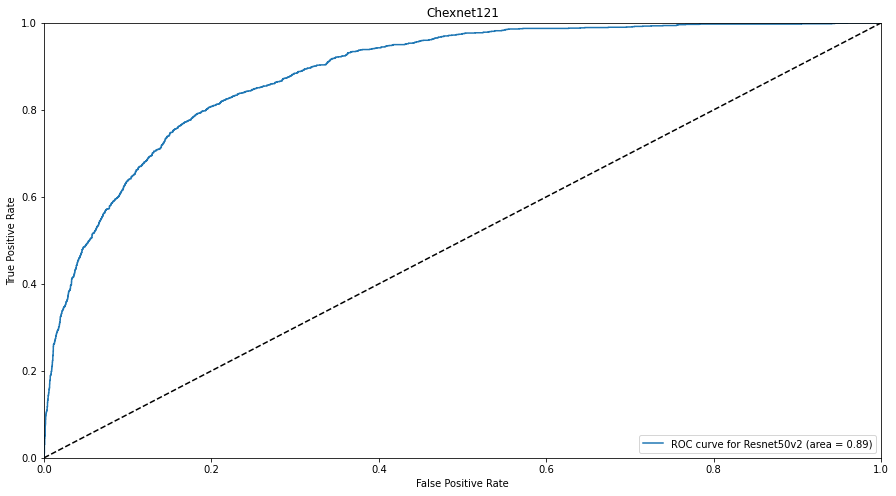

In [196]:
# Plot the ROC
# Plot ROC curve
plt.figure(figsize=(15, 8))
plt.clf()
plt.plot(fpr1, tpr1, label='ROC curve for Resnet50v2 (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Chexnet121')
plt.legend(loc="lower right")
plt.show()

In [197]:
threshold:float = 0.5
predictions_list_threshold:list = [0 if prediction <= threshold else 1 for prediction in predictions_list]
over_all_f1_score = round(f1_score(actual_list,predictions_list_threshold, average='macro'),2)
print(f'The f1 score is {over_all_f1_score}')
print(
    f"The testing accuracy of best parameter  : {accuracy_score(actual_list,predictions_list_threshold)}"
)

data = (
    pd.DataFrame(classification_report(actual_list,predictions_list_threshold, output_dict=True))
    .T.reset_index()
    .iloc[:-3, :]
    .rename(columns={"index": "classes_name"}, inplace=False)
)
data

The f1 score is 0.74
The testing accuracy of best parameter  : 0.8454504572028182


classes_name  precision    recall  f1-score  support
0            0   0.858430  0.958591  0.905750   5168.0
1            1   0.762222  0.456420  0.570953   1503.0

In [198]:
cf_matrix = confusion_matrix(actual_list,predictions_list_threshold)
print(cf_matrix)

[[4954  214]
 [ 817  686]]


<AxesSubplot:>

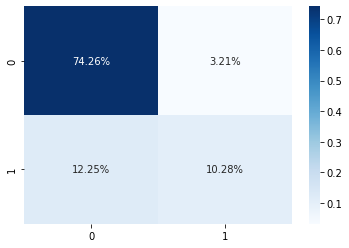

In [199]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

#### On Test data

In [200]:
images_names = normal_file_names+inf_file_names
labels = label_normal+label_inf 
def get_testImage():
    for file_name,label in zip(images_names,labels):
        if label == 0:
            file_path:str = os.path.join(path_normal,file_name)
        else:
            file_path:str = os.path.join(path_infected,file_name)
        
        pixels_values = cv2.imread(
        file_path,0
        )
        pixels_values:np.array = np.stack((pixels_values,) * 3, -1)
        #resizing the image
        pixels_values:np.array = cv2.resize(pixels_values, (224,224),interpolation = cv2.INTER_NEAREST).astype('float16')
        #scaling the image.
        pixels_values:np.array = pixels_values/pixels_values.max()
        yield pixels_values,label
    
test_iterator = tf.data.Dataset.from_generator(get_testImage,
                                                   output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
test_iterator = test_iterator.batch(batch_size=1)
predictions_list_test = []
actual_list_test = []
for batch in test_iterator:
    arr,la = batch
    predictions = chexnet_121_model.predict(arr)
    predictions_list_test.append(float(predictions[0]))
    actual_list_test.append(int(la))

1/1 [==============================] - 0s 234ms/step


1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 0s 250ms/step


In [201]:
fpr1, tpr1, thresholds1 = roc_curve(actual_list_test,predictions_list_test)
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.930528


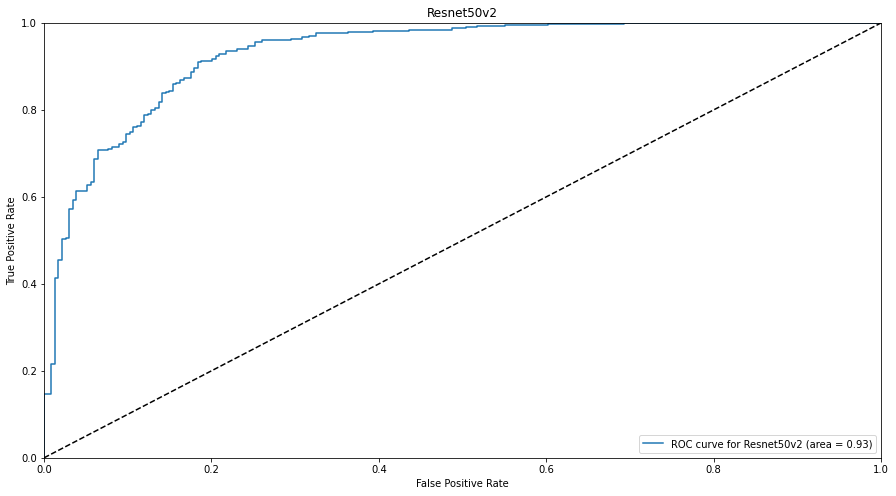

In [202]:
# Plot the ROC
# Plot ROC curve
plt.figure(figsize=(15, 8))
plt.clf()
plt.plot(fpr1, tpr1, label='ROC curve for Resnet50v2 (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Resnet50v2')
plt.legend(loc="lower right")
plt.show()

In [203]:
threshold:float = 0.5
predictions_list_threshold:list = [0 if prediction <= threshold else 1 for prediction in predictions_list_test]
over_all_f1_score = round(f1_score(actual_list_test,predictions_list_threshold, average='macro'),2)
print(f'The f1 score is {over_all_f1_score}')
print(
    f"The testing accuracy of best parameter  : {accuracy_score(actual_list_test,predictions_list_threshold)}"
)

data = (
    pd.DataFrame(classification_report(actual_list_test,predictions_list_threshold, output_dict=True))
    .T.reset_index()
    .iloc[:-3, :]
    .rename(columns={"index": "classes_name"}, inplace=False)
)
data

The f1 score is 0.44
The testing accuracy of best parameter  : 0.47596153846153844


classes_name  precision    recall  f1-score  support
0            0   0.416517  0.991453  0.586599    234.0
1            1   0.970149  0.166667  0.284464    390.0

In [204]:
cf_matrix = confusion_matrix(actual_list_test,predictions_list_threshold)
print(cf_matrix)

[[232   2]
 [325  65]]


<AxesSubplot:>

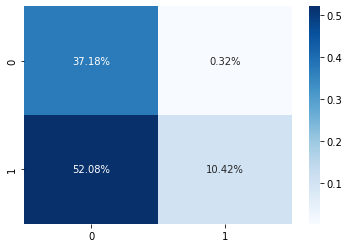

In [205]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

## Predict function